 # Les ventes de la librairie **Lapage**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import datetime as dt
import scipy.stats as st
import os
import datetime
os.chdir("C:/Users/majai/Dropbox/DATA ANALYST formation/Project 6/Livrables")

#  Importer, explorer, nettoyer et préparer les données pour analyse

## Les produits

In [2]:
products = pd.read_csv('DAN-P6-donnees/DAN-P6-donnees/products.csv')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [3]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [4]:
products["id_prod"].duplicated().sum()

0

In [5]:
products["categ"].unique()

array([0, 1, 2], dtype=int64)

In [6]:
products["price"].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [7]:
products[products["price"]<=0]

,id_prod,price,categ
731,T_0,-1.0,0


Le produit **T_0** a un prix négatif. Il s'agit d'un produit de test que je peux exclure de l'analyse.

In [8]:
products = products[products["price"]>0]

Il semble que le premier caractère de *id_prod* représente la catégorie du produit. Je vais vérifier si toutes les catégories sont correctement attribuées.

In [9]:
def category(x):
    return x[0:1]

products["category"] = products["id_prod"].apply(category)
products["category"] = np.asarray(products["category"], dtype=np.int)

C:\Users\majai\AppData\Local\Temp/ipykernel_34904/3435754663.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  products["category"] = np.asarray(products["category"], dtype=np.int)


In [10]:
products[products["categ"]!=products["category"]]

,id_prod,price,categ,category


In [11]:
products.describe()

,price,categ,category
count,3286.000000,3286.000000,3286.000000
mean,21.863597,0.370359,0.370359
std,29.849786,0.615446,0.615446
min,0.620000,0.000000,0.000000
25%,6.990000,0.000000,0.000000
50%,13.075000,0.000000,0.000000
75%,22.990000,1.000000,1.000000
max,300.000000,2.000000,2.000000


In [12]:
q1 = np.percentile(products["price"], 25)
q2 = np.percentile(products["price"], 50)
q3 = np.percentile(products["price"], 75)
iqr = q3-q1
print("Le premier quartile des prix est de %.2f €, le deuxième quartile ou médiane est de %.2f €, et le troisième quartile est de %.2f €. L'intervalle interquatile est %.2f €." % (q1, q2, q3, iqr))

Le premier quartile des prix est de 6.99 €, le deuxième quartile ou médiane est de 13.07 €, et le troisième quartile est de 22.99 €. L'intervalle interquatile est 16.00 €.


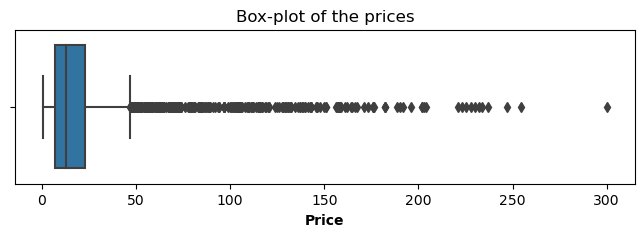

In [13]:
plt.subplots(figsize=[8,2])
sns.boxplot(data=products, x="price")
plt.title("Box-plot of the prices")
plt.xlabel("Price", fontweight="bold")
plt.show()

In [14]:
lim = q3 + 1.5*iqr 
print("Les prix supérieurs à %.2f € sont des valeurs aberrantes." %lim) 

Les prix supérieurs à 46.99 € sont des valeurs aberrantes.


In [15]:
bin_width = (2 * iqr) / (len(products) ** (1 / 3))
bin_count = int(np.ceil((products["price"].max() - products["price"].min()) / bin_width))

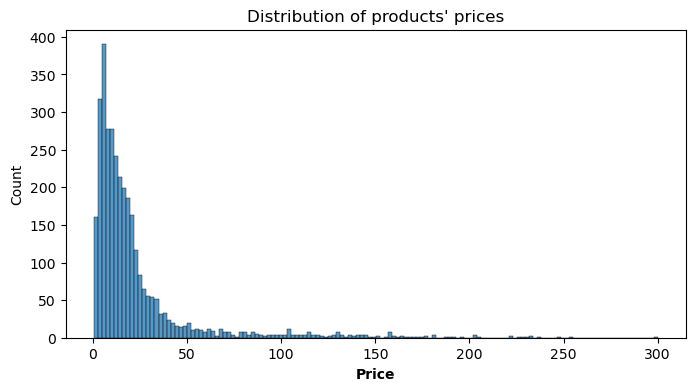

In [16]:
plt.subplots(figsize=[8,4])
sns.histplot(data=products, x="price", bins=bin_count)
plt.title("Distribution of products' prices")
plt.xlabel("Price", fontweight="bold")
plt.show()

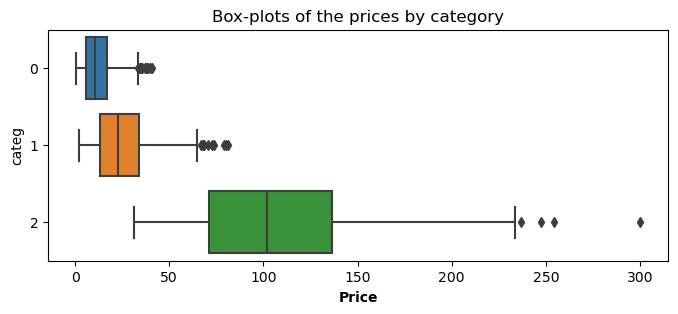

In [17]:
plt.subplots(figsize=[8,3])
sns.boxplot(data=products, x="price", y="categ", orient="h")
plt.title("Box-plots of the prices by category")
plt.xlabel("Price", fontweight="bold")
plt.show()

In [18]:
round(products.groupby("categ")["price"].mean(), 2)

categ
0     11.73
1     25.53
2    108.35
Name: price, dtype: float64

Il existe 3286 produits différents, répartis en trois catégories. Le prix moyen pour tous les produits est de 21,86 €, mais le prix moyen diffère selon la catégorie, de sorte que le prix moyen de la catégorie 0 est de 11,73 €, le prix moyen de la catégorie 1 est de 25,53 € et le prix moyen de la catégorie 2 est de 108,35 €. €. Les prix des produits ont une distribution log-normale.

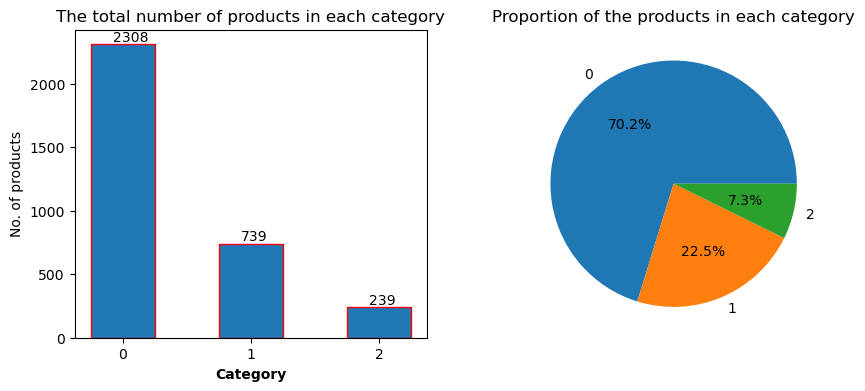

In [19]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

ax = axes[0]
categories = ["0", "1", "2"]
totals = products.groupby("categ")["price"].count()
ax.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 25
for i in range(len(categories)):
    ax.annotate(totals[i], (-0.08+i, totals[i] + j))
ax.set_xlabel('Category', fontweight="bold")
ax.set_ylabel('No. of products')
ax.set_title("The total number of products in each category")


ax = axes[1]
labs = ["0", "1", "2"]
ax.pie(products["categ"].value_counts(), labels=labs, autopct='%1.1f%%')
ax.set_title("Proportion of the products in each category")

plt.show()

## Les clients

In [20]:
customers = pd.read_csv('DAN-P6-donnees/DAN-P6-donnees/customers.csv')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [21]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [22]:
customers["client_id"].duplicated().sum()

0

In [23]:
customers["sex"].unique()

array(['f', 'm'], dtype=object)

In [24]:
customers["sex"].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

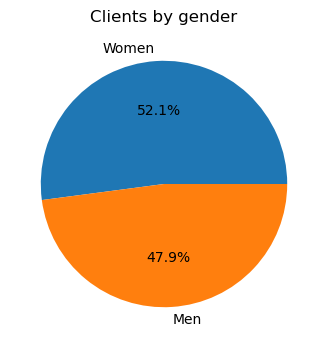

In [25]:
plt.subplots(figsize=[4,4])
labs = ["Women", "Men"]
plt.pie(customers["sex"].value_counts(), labels=labs, autopct='%1.1f%%')
plt.title("Clients by gender")
plt.show()

In [26]:
customers["birth"].sort_values().unique()

array([1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004],
      dtype=int64)

In [27]:
customers["age"] = 2022 - customers["birth"]

In [28]:
print("Les clients ont en moyenne %.f ans." % round(customers["age"].mean(), 0))

Les clients ont en moyenne 44 ans.


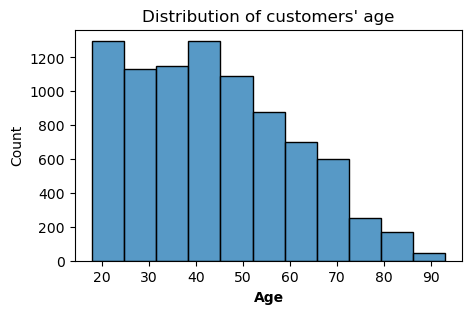

In [29]:
plt.subplots(figsize=[5,3])
sns.histplot(data=customers, x="age", bins=11)
plt.title("Distribution of customers' age")
plt.xlabel("Age", fontweight="bold")
plt.show()

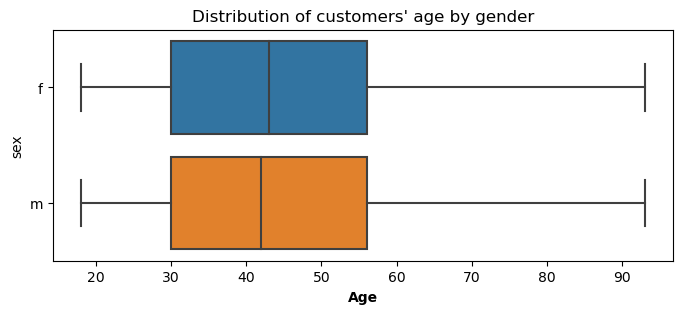

In [30]:
plt.subplots(figsize=[8,3])
sns.boxplot(data=customers, x="age", y="sex", orient="h")
plt.title("Distribution of customers' age by gender")
plt.xlabel("Age", fontweight="bold")
plt.show()

Vérifier si chaque **client_id** commence par "c":

In [31]:
cl = customers["client_id"].apply(category)
cl.unique()

array(['c'], dtype=object)

In [32]:
customers.describe()

,birth,age
count,8623.000000,8623.000000
mean,1978.280877,43.719123
std,16.919535,16.919535
min,1929.000000,18.000000
25%,1966.000000,30.000000
50%,1979.000000,43.000000
75%,1992.000000,56.000000
max,2004.000000,93.000000


Il y a 8623 clients, dont 52% de femmes et 48% d'hommes, âgés de 44 ans en moyenne.

## Les transactions

In [33]:
transactions = pd.read_csv('DAN-P6-donnees/DAN-P6-donnees/transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [34]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [35]:
transactions["date"].min(),  transactions["date"].max()

('2021-03-01 00:01:07.843138', 'test_2021-03-01 02:30:02.237450')

In [36]:
def test(x):
    return x[0:4]

transactions["test"] = transactions["date"].apply(test)
transactions["test"].unique()

array(['2022', '2021', '2023', 'test'], dtype=object)

In [37]:
transactions[transactions["test"]=="test"]["id_prod"].unique()

array(['T_0'], dtype=object)

In [38]:
len(transactions[transactions["test"]=="test"]), len(transactions[transactions["id_prod"]=="T_0"])

(200, 200)

Il y a 200 transactions de test, je peux les supprimer des données.

In [39]:
transactions = transactions[transactions["test"]!="test"]

In [40]:
transactions.duplicated().sum()

0

In [41]:
len(transactions["id_prod"].unique())

3266

In [42]:
len(transactions["client_id"].unique())

8600

In [43]:
len(transactions["session_id"].unique())

342315

8 600 clients ont effectué 342 315 achats. Il y avait 3 266 livres différents offerts en ligne.

In [44]:
from datetime import datetime

def datum(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')

transactions["date"] = transactions["date"].apply(datum)

In [45]:
transactions["date"].describe(datetime_is_numeric=True)

count                           679332
mean     2022-03-03 15:13:19.307389696
min         2021-03-01 00:01:07.843138
25%      2021-09-08 09:14:25.055994368
50%      2022-03-03 07:50:20.817730560
75%      2022-08-30 23:57:08.555173888
max         2023-02-28 23:58:30.792755
Name: date, dtype: object

En deux ans, *LaPage* a vendu au total 679 332 livres.

## Les données

In [46]:
data = pd.merge(transactions, products, on="id_prod", how="left")
data = pd.merge(data, customers, on="client_id", how="left").sort_values(by="id_prod")
data.head()

,id_prod,date,session_id,client_id,test,price,categ,category,sex,birth,age
627831,0_0,2023-01-12 03:30:49.268477,s_325626,c_7672,2023,3.75,0.0,0.0,m,1991,31
186885,0_0,2022-08-24 02:59:36.000369,s_257618,c_2596,2022,3.75,0.0,0.0,f,1985,37
389151,0_0,2021-11-09 08:32:06.615844,s_116977,c_8486,2021,3.75,0.0,0.0,f,1978,44
592003,0_0,2021-08-18 17:21:16.393989,s_77507,c_1609,2021,3.75,0.0,0.0,m,1980,42
536299,0_0,2021-04-16 02:19:21.368517,s_21175,c_7092,2021,3.75,0.0,0.0,f,1985,37


In [47]:
data = data.drop(columns=["test", "category"])

In [48]:
data.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
sex             0
birth           0
age             0
dtype: int64

In [49]:
data[data["price"].isnull()]["id_prod"].unique()

array(['0_2245'], dtype=object)

Il manque le prix et la catégorie du produit **0_2245**.

De **id_prod** je peux voir que ce produit est en catégorie 0, et le prix du produit je vais estimer avec le prix moyen de tous les produits de la catégorie 0. 

In [50]:
m0 = products[products["categ"]==0]["price"].mean()
data.loc[(data.id_prod=='0_2245',"price")] = m0
data.loc[(data.id_prod=='0_2245', "categ")] = 0

In [51]:
data["datum"] = pd.to_datetime(data["date"]).dt.date

In [52]:
data["n"] = 1.0

In [53]:
# find the day of the week: 0=Monday, 6=Sunday
def dan_tj(x):
    return x.weekday()
    
data["weekday"] = data["date"].apply(dan_tj)

In [54]:
def dan(x):
    return x.day

data["day"] = data["date"].apply(dan)

In [55]:
def misec(x):
    return x.month

data["month"] = data["date"].apply(misec)

In [56]:
def god(x):
    return x.year

data["year"] = data["date"].apply(god)

In [57]:
def sat(x):
    return x.hour

data["hour"] = data["date"].apply(sat)

In [58]:
data["price_0"] = 0.0
data["price_1"] = 0.0
data["price_2"] = 0.0

data.loc[(data.categ==0, "price_0")] = data.price
data.loc[(data.categ==1, "price_1")] = data.price
data.loc[(data.categ==2, "price_2")] = data.price

data["n_0"] = 0.0
data["n_1"] = 0.0
data["n_2"] = 0.0

data.loc[(data.categ==0, "n_0")] = data.n
data.loc[(data.categ==1, "n_1")] = data.n
data.loc[(data.categ==2, "n_2")] = data.n

In [59]:
data.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,datum,...,day,month,year,hour,price_0,price_1,price_2,n_0,n_1,n_2
627831,0_0,2023-01-12 03:30:49.268477,s_325626,c_7672,3.75,0.0,m,1991,31,2023-01-12,...,12,1,2023,3,3.75,0.0,0.0,1.0,0.0,0.0
186885,0_0,2022-08-24 02:59:36.000369,s_257618,c_2596,3.75,0.0,f,1985,37,2022-08-24,...,24,8,2022,2,3.75,0.0,0.0,1.0,0.0,0.0
389151,0_0,2021-11-09 08:32:06.615844,s_116977,c_8486,3.75,0.0,f,1978,44,2021-11-09,...,9,11,2021,8,3.75,0.0,0.0,1.0,0.0,0.0
592003,0_0,2021-08-18 17:21:16.393989,s_77507,c_1609,3.75,0.0,m,1980,42,2021-08-18,...,18,8,2021,17,3.75,0.0,0.0,1.0,0.0,0.0
536299,0_0,2021-04-16 02:19:21.368517,s_21175,c_7092,3.75,0.0,f,1985,37,2021-04-16,...,16,4,2021,2,3.75,0.0,0.0,1.0,0.0,0.0


#  L'Analyse

## Chiffre d'affaires

In [60]:
#total revenue, total number of books sold
round(data["price"].sum(), 2), data["n"].sum()

(11856321.63, 679332.0)

En deux ans de ventes en ligne, la boutique *Lapage* a vendu **679 332** livres pour un total de **11,86 M€**.

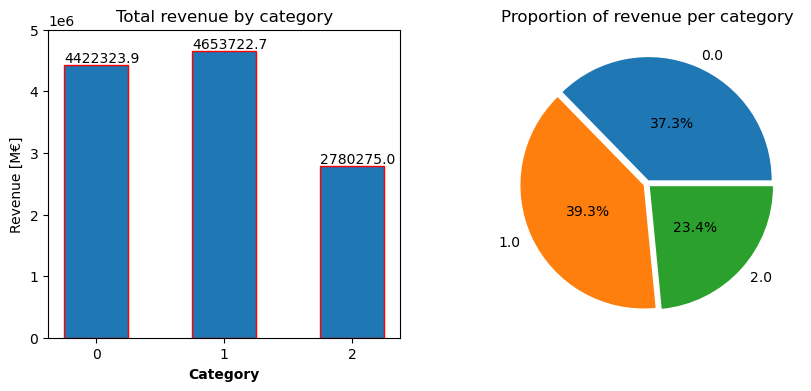

In [61]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

ax = axes[0]
categories = ["0", "1", "2"]
totals = round(data.groupby("categ")["price"].sum(), 1)
ax.set_ylim([0,5000000])
ax.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 50000
for i in range(len(categories)):
    ax.annotate(totals[i], (-0.25+i, totals[i] + j))
ax.set_title("Total revenue by category")
ax.set_xlabel('Category', fontweight="bold")
ax.set_ylabel('Revenue [M€]')

ax = axes[1]
data.groupby("categ")["price"].sum().plot.pie(autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5)
ax.set_ylabel("")
ax.set_title("Proportion of revenue per category")

plt.show()

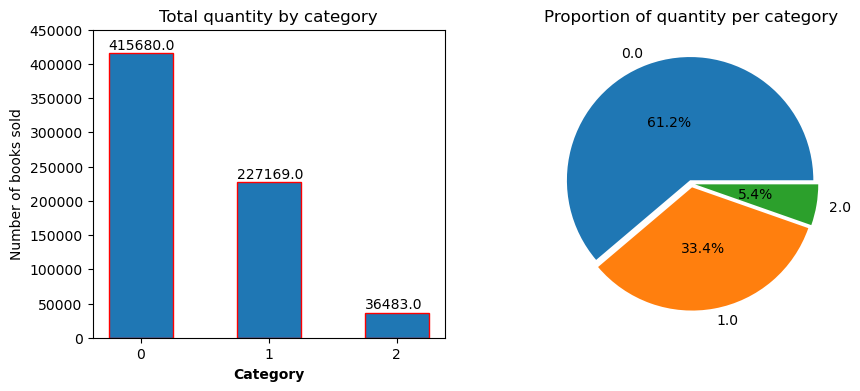

In [62]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

ax = axes[0]
categories = ["0", "1", "2"]
totals = round(data.groupby("categ")["n"].sum())
ax.set_ylim([0,450000])
ax.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 6000
for i in range(len(categories)):
    ax.annotate(totals[i], (-0.25+i, totals[i] + j))
ax.set_title("Total quantity by category")
ax.set_xlabel('Category', fontweight="bold")
ax.set_ylabel('Number of books sold')

ax = axes[1]
data.groupby("categ")["n"].sum().plot.pie(autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5)
ax.set_ylabel("")
ax.set_title("Proportion of quantity per category")

plt.show()

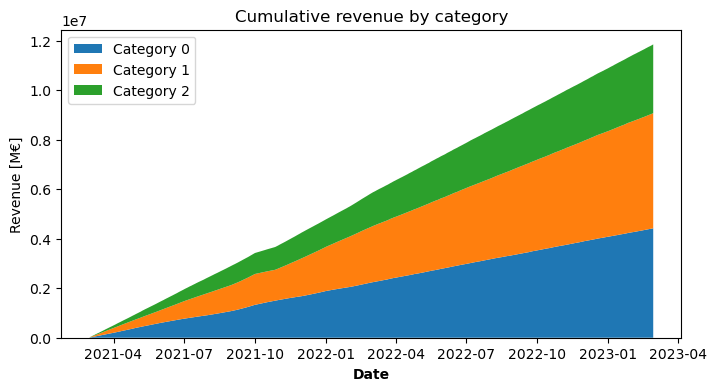

In [63]:
cumul = pd.pivot_table(data, values={"price", "price_0", "price_1", "price_2"}, index={"datum"},  aggfunc=np.sum)
cumul["cum_ca0"] = cumul["price_0"].cumsum()
cumul["cum_ca1"] = cumul["price_1"].cumsum()
cumul["cum_ca2"] = cumul["price_2"].cumsum()
x = data["datum"].sort_values().unique()
c0 = cumul["cum_ca0"]
c1 = cumul["cum_ca1"]
c2 = cumul["cum_ca2"]
plt.subplots(figsize=[8,4])
plt.stackplot(x, c0, c1, c2, labels=['Category 0','Category 1','Category 2'])
plt.legend(loc='upper left')
plt.title("Cumulative revenue by category")
plt.ylabel("Revenue [M€]")
plt.xlabel("Date", fontweight="bold")
plt.show()

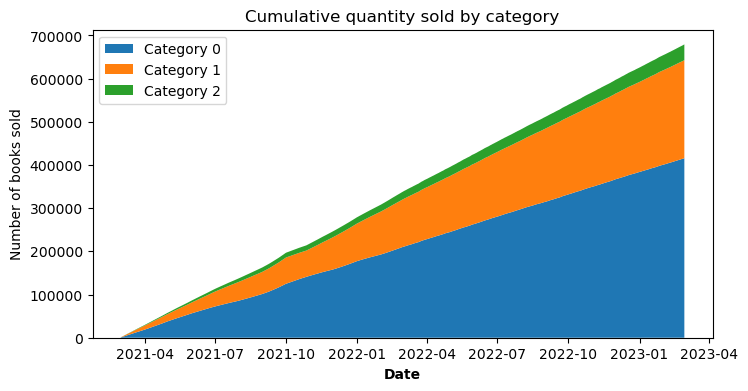

In [64]:
cumul = pd.pivot_table(data, values={"n", "n_0", "n_1", "n_2"}, index={"datum"},  aggfunc=np.sum)
cumul["cum_n0"] = cumul["n_0"].cumsum()
cumul["cum_n1"] = cumul["n_1"].cumsum()
cumul["cum_n2"] = cumul["n_2"].cumsum()
x = data["datum"].sort_values().unique()
c0 = cumul["cum_n0"]
c1 = cumul["cum_n1"]
c2 = cumul["cum_n2"]
plt.subplots(figsize=[8,4])
plt.stackplot(x, c0, c1, c2, labels=['Category 0','Category 1','Category 2'])
plt.legend(loc='upper left')
plt.title("Cumulative quantity sold by category")
plt.ylabel("Number of books sold")
plt.xlabel("Date", fontweight="bold")
plt.show()

Je voudrais vérifier si les acheteurs ont le moment préféré de la journée ou le jour préféré de la semaine pour acheter.

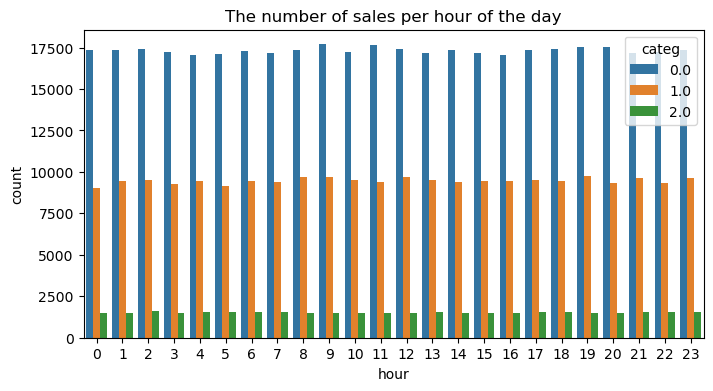

In [65]:
plt.subplots(figsize=[8,4])
sns.countplot(x="hour", hue="categ", data=data)
plt.title("The number of sales per hour of the day")
plt.show()

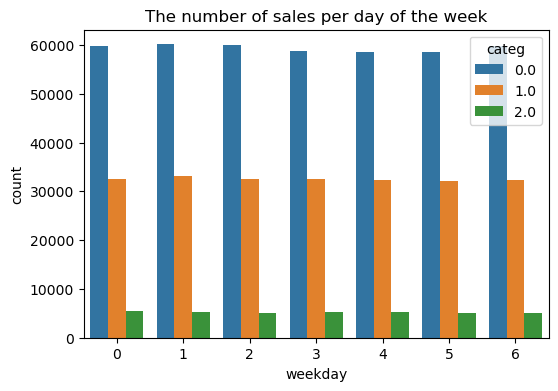

In [66]:
plt.subplots(figsize=[6,4])
sns.countplot(x="weekday", hue="categ", data=data)
plt.title("The number of sales per day of the week")
plt.show()

Les ventes sont uniformément réparties sur l'heure de la journée et les jours de la semaine.

## L’évolution dans le temps 

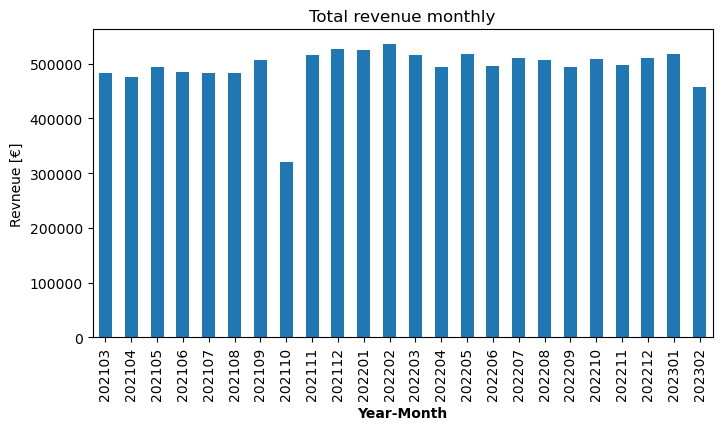

In [67]:
data["yyyymm"] = 100*data["year"] + data["month"]

plt.subplots(figsize=[8,4])
data.groupby("yyyymm")["price"].sum().plot.bar()
plt.title("Total revenue monthly")
plt.ylabel("Revneue [€]")
plt.xlabel("Year-Month", fontweight="bold")
plt.show()

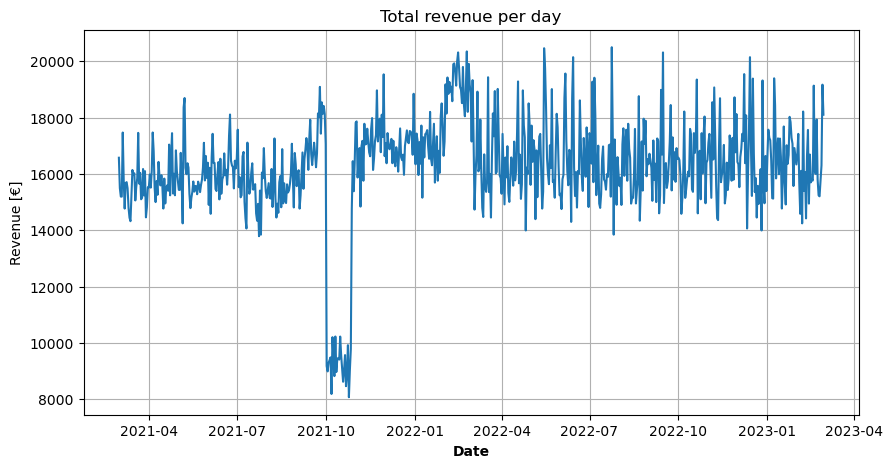

In [68]:
plt.subplots(figsize=[10,5])
data.groupby("datum")["price"].sum().plot()
plt.grid()
plt.title("Total revenue per day")
plt.ylabel("Revenue [€]")
plt.xlabel("Date", fontweight="bold")
plt.show()

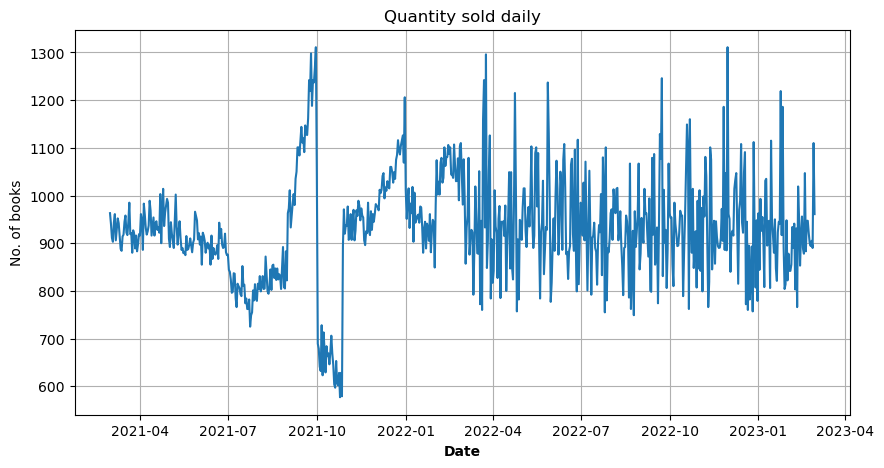

In [69]:
plt.subplots(figsize=[10,5])
data.groupby("datum")["n"].count().plot()
plt.grid()
plt.title("Quantity sold daily")
plt.ylabel("No. of books")
plt.xlabel("Date", fontweight="bold")
plt.show()

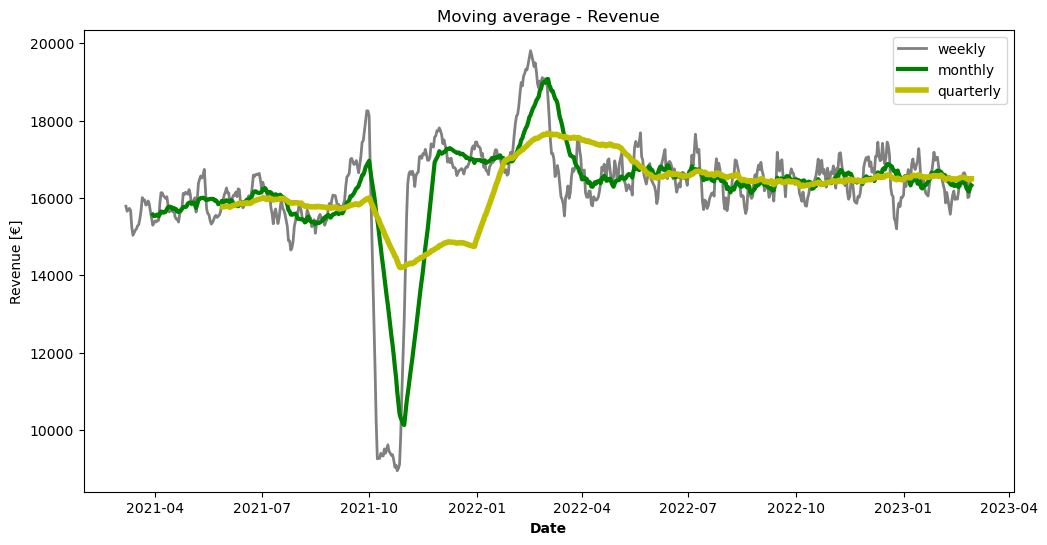

In [70]:
plt.subplots(figsize=[12,6])
data.groupby("datum")["price"].sum().rolling(7).mean().plot(linewidth=2, color="grey")
data.groupby("datum")["price"].sum().rolling(30).mean().plot(linewidth=3, color="g")
data.groupby("datum")["price"].sum().rolling(90).mean().plot(linewidth=4, color="y")

plt.legend(labels=["weekly", "monthly", "quarterly"])
plt.title("Moving average - Revenue")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Revenue [€]")
plt.show()

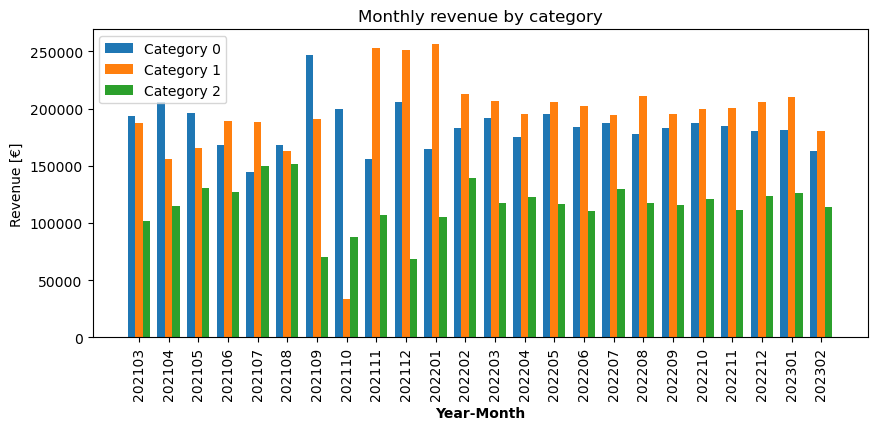

In [71]:
plt.subplots(figsize=[10,4])
barWidth = 0.25
 
# set heights of bars
bars1 = data[data["categ"]==0].groupby("yyyymm")["price"].sum()
bars2 = data[data["categ"]==1].groupby("yyyymm")["price"].sum()
bars3 = data[data["categ"]==2].groupby("yyyymm")["price"].sum()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Category 0')
plt.bar(r2, bars2, width=barWidth, label='Category 1')
plt.bar(r3, bars3, width=barWidth, label='Category 2')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year-Month', fontweight='bold')
plt.ylabel("Revenue [€]")
plt.xticks([r + barWidth for r in range(len(bars1))], data["yyyymm"].sort_values().unique(), rotation=90)
 
# Create legend & Show graphic
plt.title("Monthly revenue by category")
plt.legend()
plt.show()

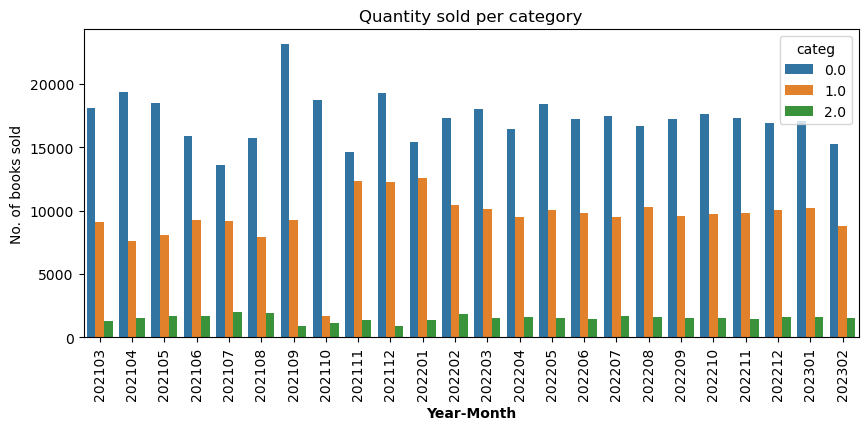

In [72]:
plt.subplots(figsize=[10,4])
sns.countplot(x="yyyymm", hue="categ", data=data)
plt.xticks(rotation=90)
plt.xlabel("Year-Month", fontweight="bold")
plt.ylabel("No. of books sold")
plt.title("Quantity sold per category")
plt.show()

Les données d'octobre 2021 ne suivent pas le schéma des autres mois.

Il peut y avoir deux raisons possibles :

- les clients n'ont pas autant acheté les livres de la catégorie 1 que d'habitude

- les données sont incomplètes

Je vais retirer ce mois-ci de l'analyse et observer à nouveau la moyenne mobile.

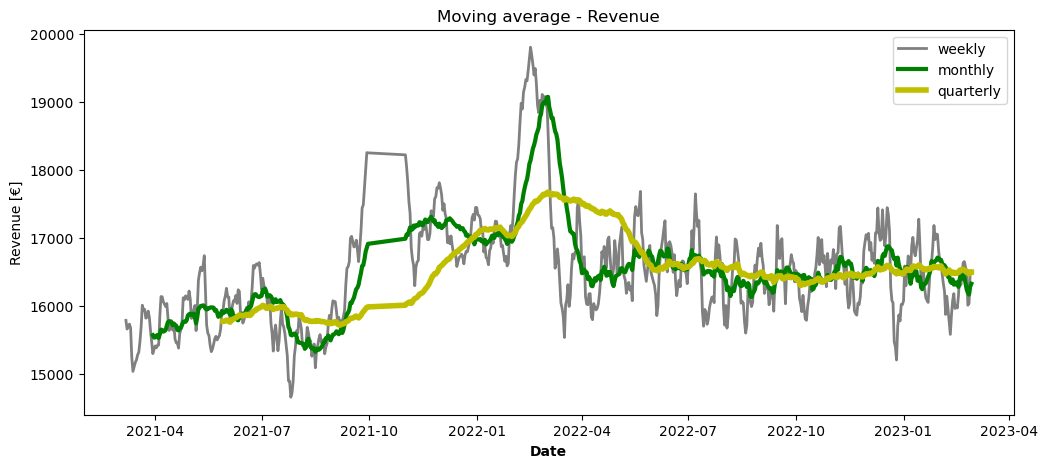

In [73]:
analyse = data[data["yyyymm"]!=202110]

plt.subplots(figsize=[12,5])
analyse.groupby("datum")["price"].sum().rolling(7).mean().plot(linewidth=2, color="grey")
analyse.groupby("datum")["price"].sum().rolling(30).mean().plot(linewidth=3, color="g")
analyse.groupby("datum")["price"].sum().rolling(90).mean().plot(linewidth=4, color="y")

plt.legend(labels=["weekly", "monthly", "quarterly"])
plt.title("Moving average - Revenue")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Revenue [€]")
plt.show()

Maintenant, il est plus facile de remarquer que les revenus sont stables au début, puis à partir de septembre 2021, ils commencent à croître et atteignent un pic en mars 2022. À partir de juin 2022, ils redeviennent stables.

## L'information sur les profils des clients

Les dix clients qui ont dépensé le plus d'argent:

In [74]:
total_by_client = pd.pivot_table(data, values={"n", "price"}, index=["client_id"],  aggfunc=np.sum).sort_values(by="price", ascending=False)
total_by_client[0:10]

,n,price
client_id,,
c_1609,25488.0,324033.350000
c_4958,5195.0,289760.340000
c_6714,9187.0,153669.316768
c_3454,6773.0,113673.128384
c_3263,403.0,5276.870000
c_1570,369.0,5271.620000
c_2899,105.0,5214.050000
c_2140,402.0,5208.820000
c_7319,371.0,5155.770000


Il y a 4 clients qui dépensent plus de **100 000€** chacun. Tous les autres ont dépensé moins de **5 300€**.

In [75]:
total_by_client.describe()

,n,price
count,8600.000000,8600.000000
mean,78.992093,1378.642050
std,312.437204,5182.915854
min,1.000000,6.310000
25%,27.000000,547.885000
50%,51.000000,1027.286397
75%,96.000000,1779.785000
max,25488.000000,324033.350000


En moyenne, en deux ans, un client a acheté 79 livres et a dépensé au total 1 379€.

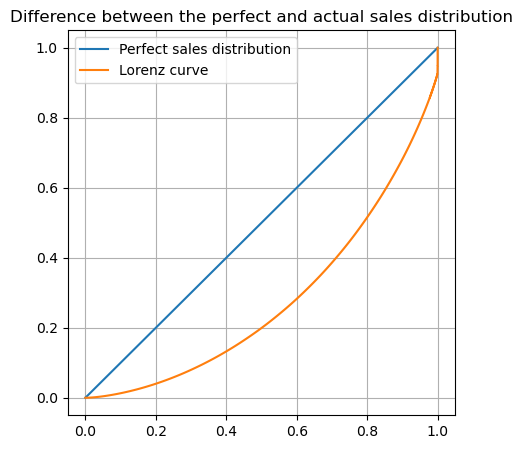

In [76]:
plt.subplots(figsize=[5,5])
plt.grid()

buy = total_by_client["price"]
lorenz = np.cumsum(np.sort(buy)) / buy.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.plot(x, y, label="Perfect sales distribution")

plt.plot(np.linspace(0, 1, len(lorenz)), lorenz, drawstyle='steps-post', label="Lorenz curve" )

#plt.xticks(x)
#plt.yticks(y)
plt.legend()
plt.title("Difference between the perfect and actual sales distribution")
plt.show()

80 % des clients ont généré environ 50 % du chiffre d'affaires total, et les autres 20 % du client ont généré 50 %. 

In [77]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # L'aire sous la courbe de Lorenz.
S = 0.5 - aire_ss_courbe # L'aire entre la 1e bissectrice et la courbe de Lorenz.
gini = S/0.5
round(gini, 4)

0.4466

Les dix livres les plus vendus (par chiffre d'affaires):

In [78]:
pd.pivot_table(data, values={"n", "price"}, index=["id_prod", "categ"],  aggfunc=np.sum).sort_values(by="price", ascending=False)[0:10]

,,n,price
id_prod,categ,,
2_159,2.0,650.0,94893.50
2_135,2.0,1005.0,69334.95
2_112,2.0,968.0,65407.76
2_102,2.0,1027.0,60736.78
2_209,2.0,814.0,56971.86
1_395,1.0,1875.0,54356.25
1_369,1.0,2252.0,54025.48
2_110,2.0,865.0,53846.25
2_39,2.0,915.0,53060.85


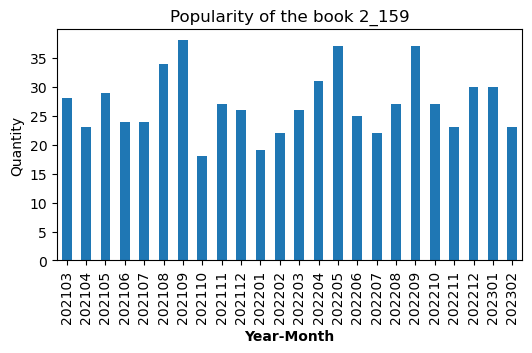

In [79]:
plt.subplots(figsize=[6,3])
data[data["id_prod"]=="2_159"].groupby("yyyymm")["n"].sum().plot.bar()
plt.title("Popularity of the book 2_159")
plt.ylabel("Quantity")
plt.xlabel("Year-Month", fontweight="bold")
plt.show()

Les dix livres les plus vendus (par nombre de ventes):

In [80]:
pd.pivot_table(data, values={"n", "price"}, index=["id_prod", "categ"],  aggfunc=np.sum).sort_values(by="n", ascending=False)[0:10]

,,n,price
id_prod,categ,,
1_369,1.0,2252.0,54025.48
1_417,1.0,2189.0,45947.11
1_414,1.0,2180.0,51949.40
1_498,1.0,2128.0,49731.36
1_425,1.0,2096.0,35611.04
1_403,1.0,1960.0,35260.40
1_412,1.0,1951.0,32484.15
1_413,1.0,1945.0,34990.55
1_406,1.0,1939.0,48106.59


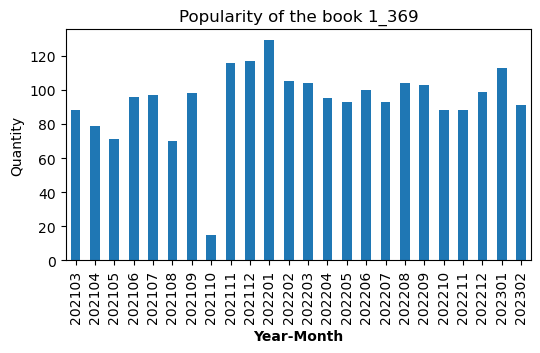

In [81]:
plt.subplots(figsize=[6,3])
data[data["id_prod"]=="1_369"].groupby("yyyymm")["n"].sum().plot.bar()
plt.title("Popularity of the book 1_369")
plt.ylabel("Quantity")
plt.xlabel("Year-Month", fontweight="bold")
plt.show()

### L'âge et le sexe des clients

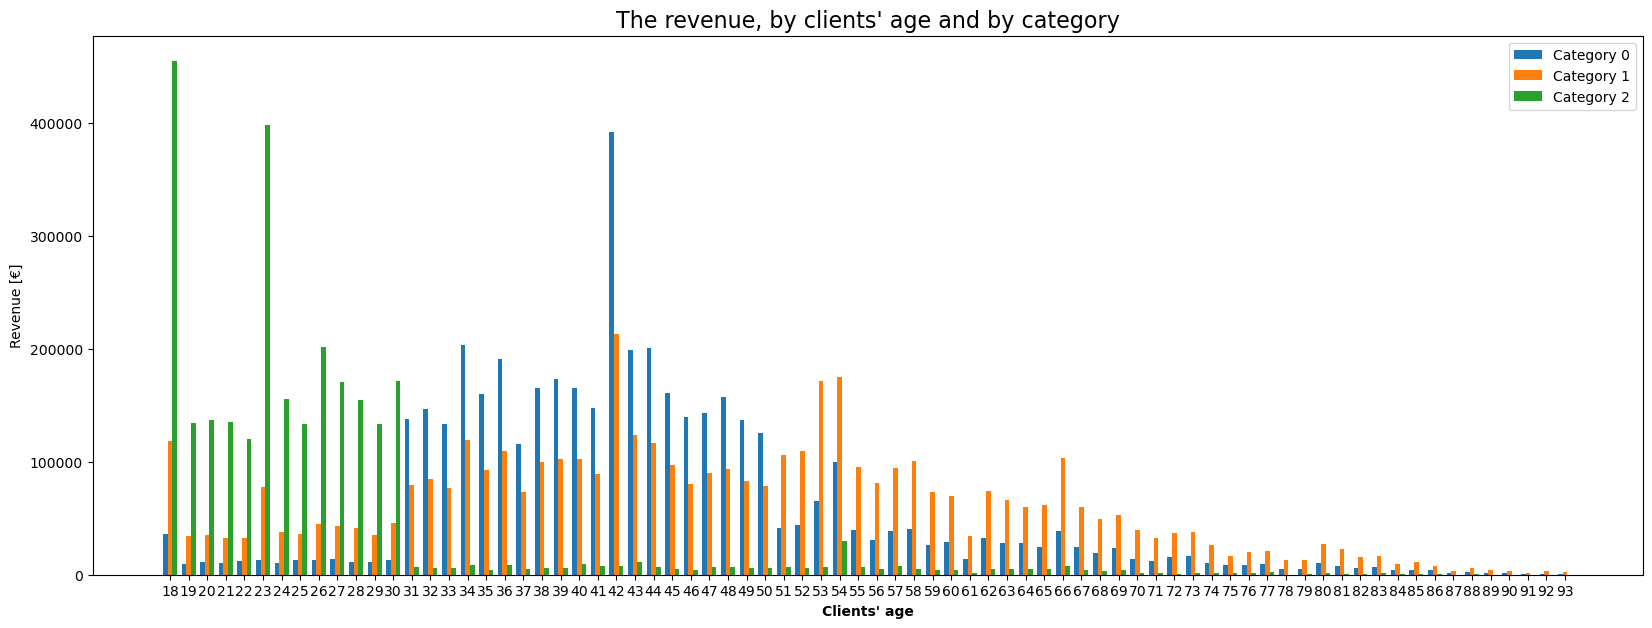

In [82]:
plt.subplots(figsize=[20,7])
barWidth = 0.25
 
# set heights of bars
bars1 = data[data["categ"]==0].groupby("age")["price"].sum()
bars2 = data[data["categ"]==1].groupby("age")["price"].sum()
bars3 = data[data["categ"]==2].groupby("age")["price"].sum()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Category 0')
plt.bar(r2, bars2, width=barWidth, label='Category 1')
plt.bar(r3, bars3, width=barWidth, label='Category 2')
 
# Add xticks on the middle of the group bars
plt.xlabel("Clients' age", fontweight='bold')
plt.ylabel("Revenue [€]")
plt.xticks([r + barWidth for r in range(len(bars1))], analyse["age"].sort_values().unique())
 
# Create legend & Show graphic
plt.title("The revenue, by clients' age and by category", fontsize=16)
plt.legend()
plt.show()

L'âge est un facteur important dans le comportement des clients. D'après le graphique ci-dessus, il est clair que je peux diviser les clients en trois groupes d'âge:

- moins de 31 ans
- du 31 au 50
- plus de 50 ans

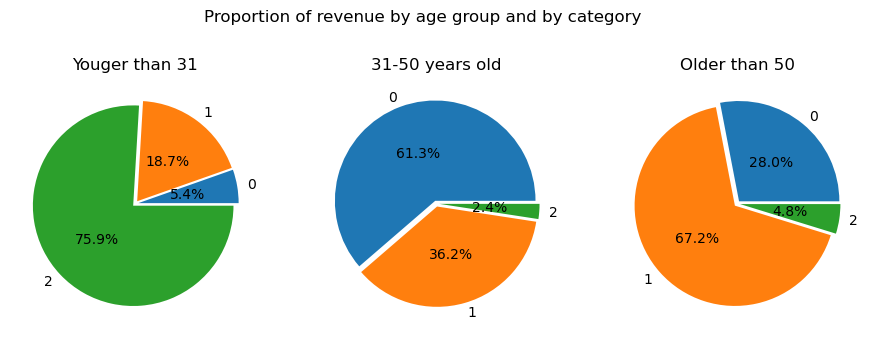

In [83]:
fig, axes = plt.subplots(1,3, figsize=[11,4])
fig.suptitle("Proportion of revenue by age group and by category")
labs = ["0", "1", "2"]

ax = axes[0]
a = data[data["age"]<31].groupby("categ")["price"].sum()
ax.pie(a, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("Youger than 31")

ax = axes[1]
b = data[(data["age"]>30)&(data["age"]<51)].groupby("categ")["price"].sum()
ax.pie(b, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("31-50 years old")

ax = axes[2]
c = data[data["age"]>50].groupby("categ")["price"].sum()
ax.pie(c, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("Older than 50")

plt.show()

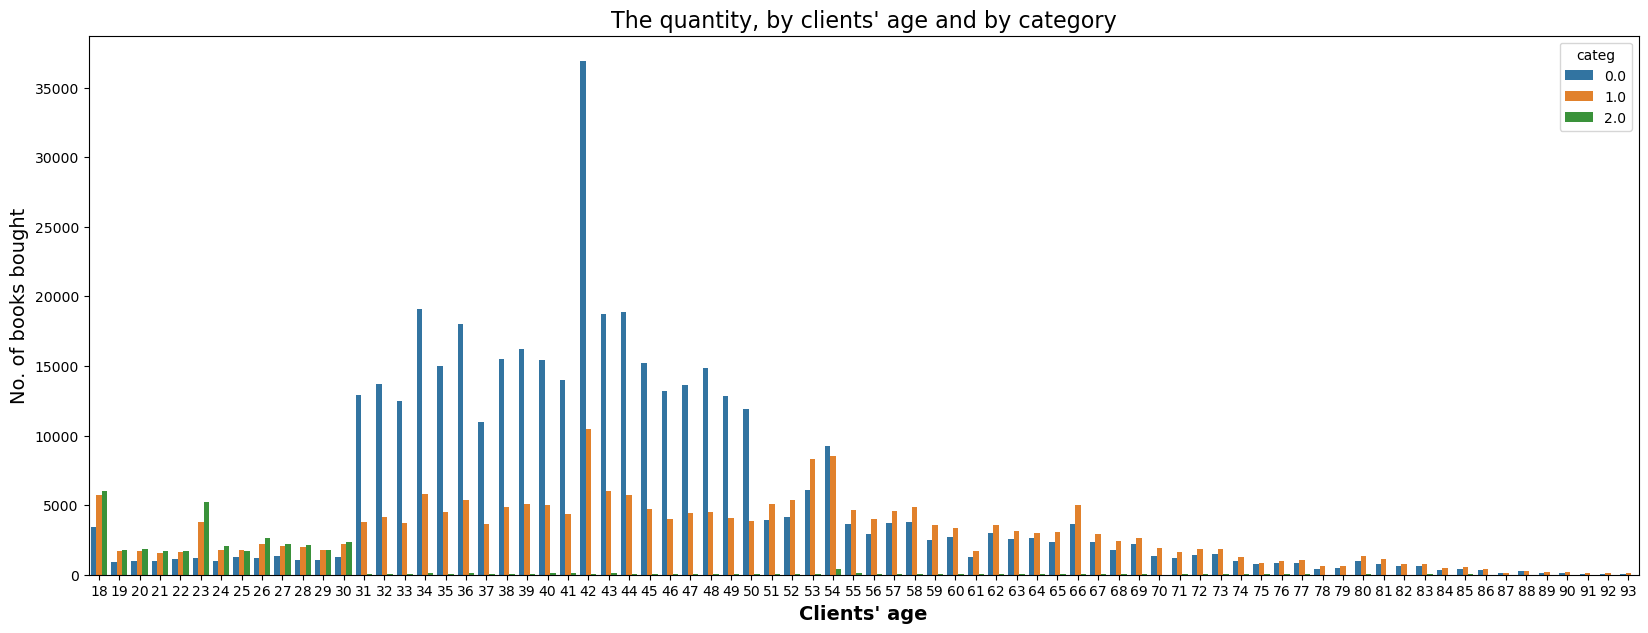

In [84]:
plt.subplots(figsize=[20,7])
sns.countplot(x="age", hue="categ", data=data)
plt.title("The quantity, by clients' age and by category", fontsize=16)
plt.xlabel("Clients' age", fontsize=14, fontweight="bold")
plt.ylabel("No. of books bought", fontsize=14)
plt.show()

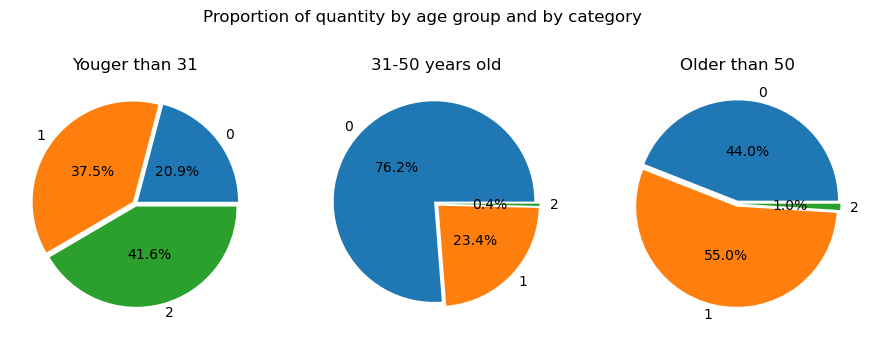

In [85]:
fig, axes = plt.subplots(1,3, figsize=[11,4])
fig.suptitle("Proportion of quantity by age group and by category")
labs = ["0", "1", "2"]

ax = axes[0]
a = data[data["age"]<31].groupby("categ")["n"].sum()
ax.pie(a, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("Youger than 31")

ax = axes[1]
b = data[(data["age"]>30)&(data["age"]<51)].groupby("categ")["n"].sum()
ax.pie(b, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("31-50 years old")

ax = axes[2]
c = data[data["age"]>50].groupby("categ")["n"].sum()
ax.pie(c, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("Older than 50")

plt.show()

In [86]:
def age_group(x):
    if x<31:
        return "A"
    elif ((x>30)&(x<51)):
        return "B"
    else:
        return "C"

data["age_group"] = data["age"].apply(age_group)

In [87]:
contigency = pd.crosstab(data["age_group"], data["categ"])
contigency

categ,0.0,1.0,2.0
age_group,,,
A,16701,29975,33182
B,319591,98121,1486
C,79388,99073,1815


In [88]:
pd.crosstab(data.age_group,data.categ).apply(lambda r:r/r.sum(), axis=1)

categ,0.0,1.0,2.0
age_group,,,
A,0.209134,0.375354,0.415513
B,0.762387,0.234068,0.003545
C,0.440369,0.549563,0.010068


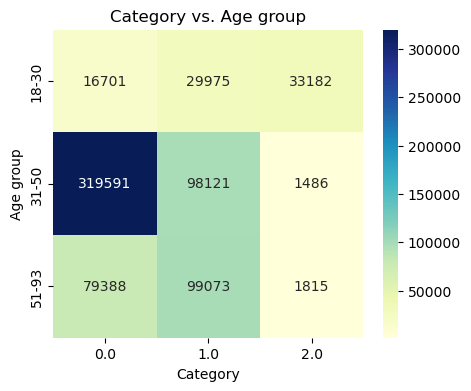

In [89]:
fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(contigency, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Category vs. Age group")
plt.xlabel("Category")
plt.ylabel("Age group"), 
labels = ["18-30", "31-50", "51-93"]
ax.set_yticklabels(labels)
plt.show()

In [90]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
p

0.0

Chi2 test donne une valeur p<0.05, ce qui signifie que la catégorie du livre dépend du groupe d'âge.

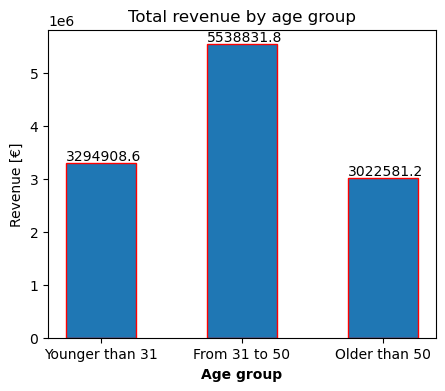

In [91]:
plt.subplots(figsize=[5,4])
categories = ["Younger than 31", "From 31 to 50", "Older than 50"]
totals = round(data.groupby("age_group")["price"].sum(), 1)
plt.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 50000
for i in range(len(categories)):
    plt.annotate(totals[i], (-0.25+i, totals[i] + j))
plt.title("Total revenue by age group")
plt.xlabel('Age group', fontweight="bold")
plt.ylabel('Revenue [€]')
plt.show()

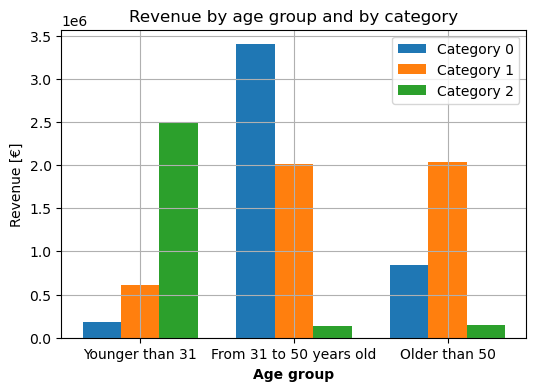

In [92]:
plt.subplots(figsize=[6,4])
plt.grid()
barWidth = 0.25
 
# set heights of bars
bars1 = data[data["categ"]==0].groupby("age_group")["price"].sum()
bars2 = data[data["categ"]==1].groupby("age_group")["price"].sum()
bars3 = data[data["categ"]==2].groupby("age_group")["price"].sum()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Category 0')
plt.bar(r2, bars2, width=barWidth, label='Category 1')
plt.bar(r3, bars3, width=barWidth, label='Category 2')
 
# Add xticks on the middle of the group bars
plt.xlabel('Age group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ["Younger than 31", "From 31 to 50 years old", "Older than 50"])
plt.title("Revenue by age group and by category")
plt.ylabel("Revenue [€]")

# Create legend & Show graphic
plt.legend()
plt.show()

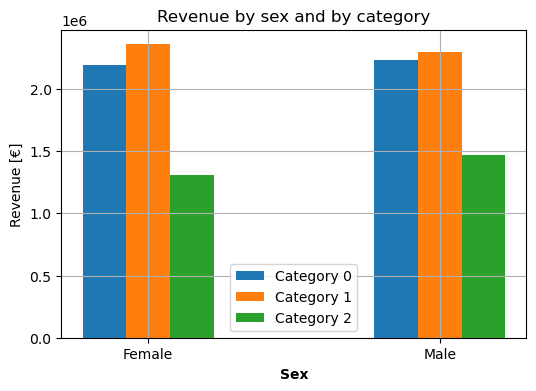

In [93]:
plt.subplots(figsize=[6,4])
plt.grid()
barWidth = 0.15
 
# set heights of bars
bars1 = data[data["categ"]==0].groupby("sex")["price"].sum()
bars2 = data[data["categ"]==1].groupby("sex")["price"].sum()
bars3 = data[data["categ"]==2].groupby("sex")["price"].sum()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Category 0')
plt.bar(r2, bars2, width=barWidth, label='Category 1')
plt.bar(r3, bars3, width=barWidth, label='Category 2')
 
# Add xticks on the middle of the group bars
plt.xlabel('Sex', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ["Female", "Male"])
plt.title("Revenue by sex and by category")
plt.ylabel("Revenue [€]")

# Create legend & Show graphic
plt.legend()
plt.show()

## Le comportement des clients. Correlations

Pour observer le comportement des clients, j'exclurai les données d'octobre 2021, ainsi que 4 gros acheteurs.

In [94]:
total_by_client.head()

,n,price
client_id,,
c_1609,25488.0,324033.350000
c_4958,5195.0,289760.340000
c_6714,9187.0,153669.316768
c_3454,6773.0,113673.128384
c_3263,403.0,5276.870000


In [95]:
analyse = data[data["yyyymm"]!=202110]
analyse = analyse[analyse["client_id"]!="c_1609"]
analyse = analyse[analyse["client_id"]!="c_4958"]
analyse = analyse[analyse["client_id"]!="c_6714"]
analyse = analyse[analyse["client_id"]!="c_3454"]

In [96]:
from scipy import stats

### Le lien entre le genre d’un client et les catégories des livres achetés

In [97]:
contigency_fm = pd.crosstab(analyse["sex"], analyse["categ"])
contigency_fm

categ,0.0,1.0,2.0
sex,,,
f,192025,110550,16429
m,178044,100227,15351


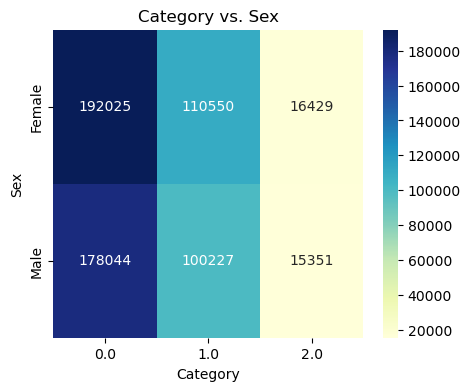

In [98]:
fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(contigency_fm, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Category vs. Sex")
plt.xlabel("Category")
plt.ylabel("Sex"), 
labels = ["Female", "Male"]
ax.set_yticklabels(labels)
plt.show()

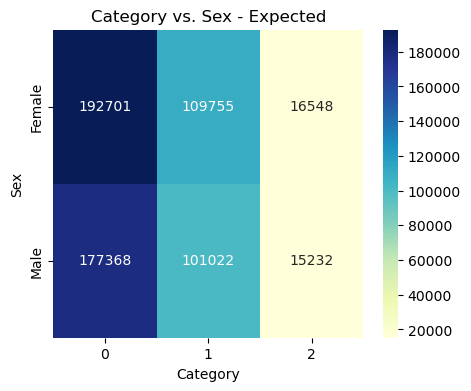

In [99]:
c, p, dof, expected = chi2_contingency(contigency_fm)

fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(expected, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Category vs. Sex - Expected")
plt.xlabel("Category")
plt.ylabel("Sex"), 
labels = ["Female", "Male"]
ax.set_yticklabels(labels)
plt.show()

Les valeurs du tableau de contingence sont très proches des valeurs attendues.

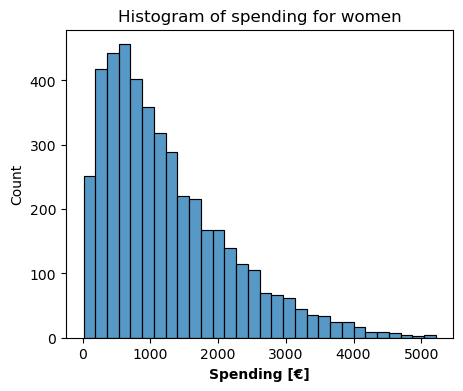

In [100]:
plt.subplots(figsize=[5,4])
sns.histplot(analyse[analyse["sex"]=="f"].groupby("client_id")["price"].sum(), bins=30)
plt.xlabel("Spending [€]", fontweight="bold")
plt.title("Histogram of spending for women")
plt.show()

In [101]:
#Kolmogorov–Smirnov test for normality of the sample: distribution is normal for p>0.05.
from scipy.stats import kstest
kstest(analyse[analyse["sex"]=="f"].groupby("client_id")["price"].sum(), cdf="norm")

KstestResult(statistic=1.0, pvalue=0.0)

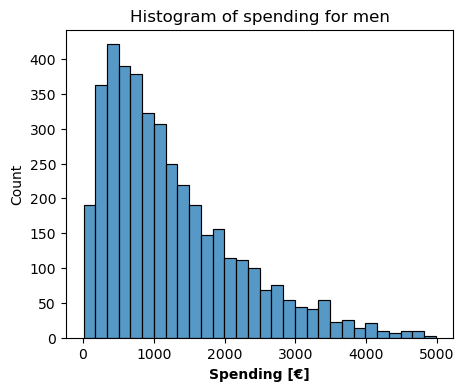

In [102]:
plt.subplots(figsize=[5,4])
sns.histplot(analyse[analyse["sex"]=="m"].groupby("client_id")["price"].sum(), bins=30)
plt.xlabel("Spending [€]", fontweight="bold")
plt.title("Histogram of spending for men")
plt.show()

In [103]:
#Kolmogorov–Smirnov test for normality of the sample
kstest(analyse[analyse["sex"]=="m"].groupby("client_id")["price"].sum(), cdf="norm")

KstestResult(statistic=1.0, pvalue=0.0)

L'échantillon est assez grand donc, même si la variable n'est pas normalement distribuée, je peux utiliser le t-test pour le moyen de l'échantillon. (Central limit theorem)

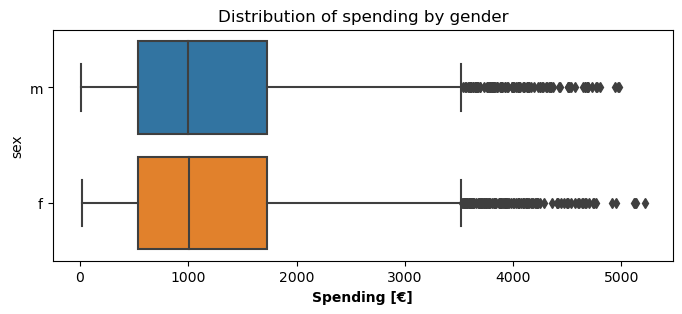

In [104]:
plt.subplots(figsize=[8,3])
d1 = analyse.groupby("client_id")["price"].sum()
d1 = pd.merge(d1, customers, on="client_id", how="left")
sns.boxplot(data=d1, x="price", y="sex", orient="h")
plt.title("Distribution of spending by gender")
plt.xlabel("Spending [€]", fontweight="bold")
plt.show()

**Question 1**

Qui dépense plus d'argent, les femmes ou les hommes ?

$H_0 :$ Les femmes et les hommes dépensent la même chose.

$H_a :$ Les femmes et les hommes ne dépensent pas la même chose.

In [105]:
f = analyse[analyse["sex"]=="f"].groupby("client_id")["price"].sum()
m = analyse[analyse["sex"]=="m"].groupby("client_id")["price"].sum()
stats.ttest_ind(f, m)

Ttest_indResult(statistic=-0.1332932602791531, pvalue=0.8939645791625097)

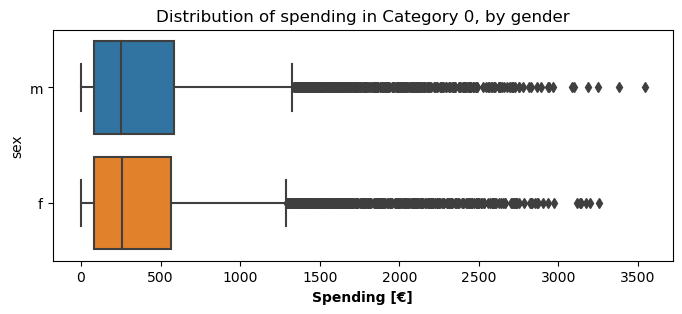

In [106]:
plt.subplots(figsize=[8,3])
d2 = analyse.groupby("client_id")["price_0"].sum()
d2 = pd.merge(d2, customers, on="client_id", how="left")
sns.boxplot(data=d2, x="price_0", y="sex", orient="h")
plt.title("Distribution of spending in Category 0, by gender")
plt.xlabel("Spending [€]", fontweight="bold")
plt.show()

In [107]:
f0 = analyse[analyse["sex"]=="f"].groupby("client_id")["price_0"].sum()
m0 = analyse[analyse["sex"]=="m"].groupby("client_id")["price_0"].sum()
stats.ttest_ind(f0, m0)

Ttest_indResult(statistic=-0.41119827900952977, pvalue=0.6809374056734641)

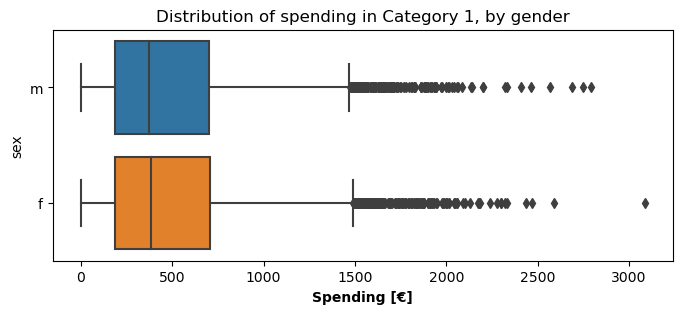

In [108]:
plt.subplots(figsize=[8,3])
d3 = analyse.groupby("client_id")["price_1"].sum()
d3 = pd.merge(d3, customers, on="client_id", how="left")
sns.boxplot(data=d3, x="price_1", y="sex", orient="h")
plt.title("Distribution of spending in Category 1, by gender")
plt.xlabel("Spending [€]", fontweight="bold")
plt.show()

In [109]:
f1 = analyse[analyse["sex"]=="f"].groupby("client_id")["price_1"].sum()
m1 = analyse[analyse["sex"]=="m"].groupby("client_id")["price_1"].sum()
stats.ttest_ind(f1, m1)

Ttest_indResult(statistic=1.0477942114372256, pvalue=0.2947629032862963)

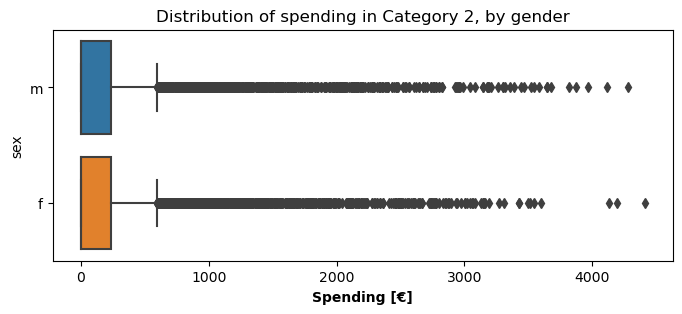

In [110]:
plt.subplots(figsize=[8,3])
d4 = analyse.groupby("client_id")["price_2"].sum()
d4 = pd.merge(d4, customers, on="client_id", how="left")
sns.boxplot(data=d4, x="price_2", y="sex", orient="h")
plt.title("Distribution of spending in Category 2, by gender")
plt.xlabel("Spending [€]", fontweight="bold")
plt.show()

In [111]:
f2 = analyse[analyse["sex"]=="f"].groupby("client_id")["price_2"].sum()
m2 = analyse[analyse["sex"]=="m"].groupby("client_id")["price_2"].sum()
stats.ttest_ind(f2, m2)

Ttest_indResult(statistic=-0.5786281677409797, pvalue=0.5628552610695002)

 Il n'y a pas de relation entre le sexe et l'argent dépensé en total, ni par catégorie. Tous les t-tests ci-dessus ne sont pas significatifs (les valeurs de p sont bien supérieures à 0.05).

**Question 2**

Qui achète plus d'articles, les femmes ou les hommes ?

$H_0 :$ Les femmes et les hommes achètent le même nombre de livres.

$H_a :$ Les femmes et les hommes n'achètent pas le même nombre de livres.

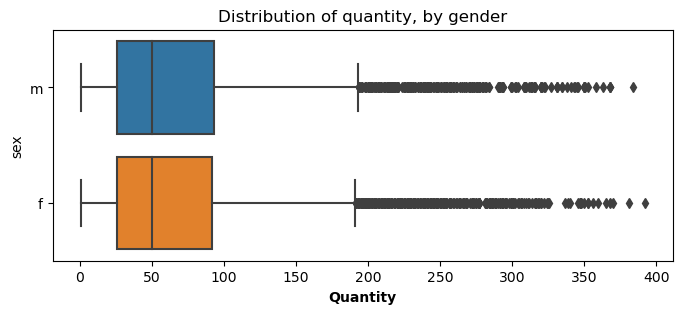

In [112]:
plt.subplots(figsize=[8,3])
nd1 = analyse.groupby("client_id")["n"].sum()
nd1 = pd.merge(nd1, customers, on="client_id", how="left")
sns.boxplot(data=nd1, x="n", y="sex", orient="h")
plt.title("Distribution of quantity, by gender")
plt.xlabel("Quantity", fontweight="bold")
plt.show()

In [113]:
f = analyse[analyse["sex"]=="f"].groupby("client_id")["n"].sum()
m = analyse[analyse["sex"]=="m"].groupby("client_id")["n"].sum()
stats.ttest_ind(f, m)

Ttest_indResult(statistic=-0.022729149774806737, pvalue=0.9818668514871175)

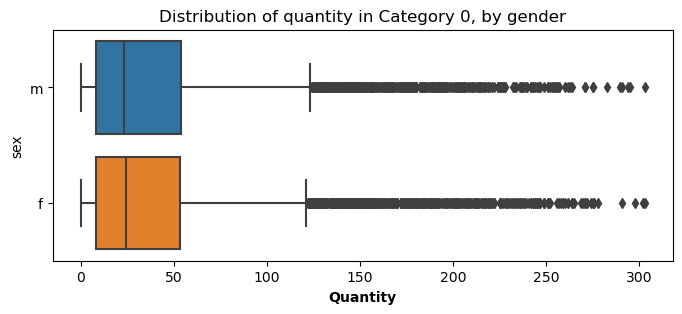

In [114]:
plt.subplots(figsize=[8,3])
nd2 = analyse.groupby("client_id")["n_0"].sum()
nd2 = pd.merge(nd2, customers, on="client_id", how="left")
sns.boxplot(data=nd2, x="n_0", y="sex", orient="h")
plt.title("Distribution of quantity in Category 0, by gender")
plt.xlabel("Quantity", fontweight="bold")
plt.show()

In [115]:
f0 = analyse[analyse["sex"]=="f"].groupby("client_id")["n_0"].sum()
m0 = analyse[analyse["sex"]=="m"].groupby("client_id")["n_0"].sum()
stats.ttest_ind(f0, m0)

Ttest_indResult(statistic=-0.29257649521076756, pvalue=0.769852946877772)

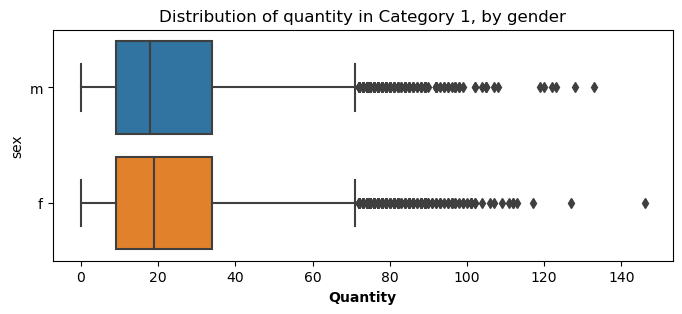

In [116]:
plt.subplots(figsize=[8,3])
nd3 = analyse.groupby("client_id")["n_1"].sum()
nd3 = pd.merge(nd3, customers, on="client_id", how="left")
sns.boxplot(data=nd3, x="n_1", y="sex", orient="h")
plt.title("Distribution of quantity in Category 1, by gender")
plt.xlabel("Quantity", fontweight="bold")
plt.show()

In [117]:
f1 = analyse[analyse["sex"]=="f"].groupby("client_id")["n_1"].sum()
m1 = analyse[analyse["sex"]=="m"].groupby("client_id")["n_1"].sum()
stats.ttest_ind(f1, m1)

Ttest_indResult(statistic=0.8139903109777199, pvalue=0.41567305951418443)

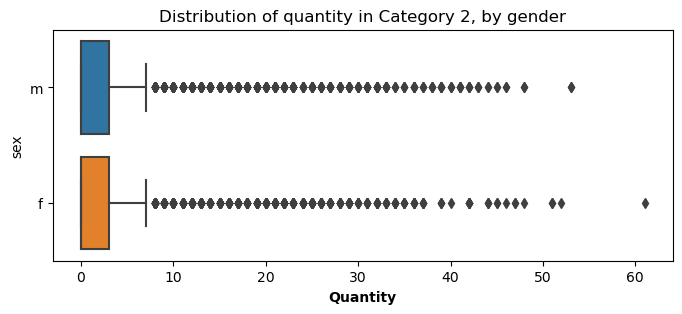

In [118]:
plt.subplots(figsize=[8,3])
nd4 = analyse.groupby("client_id")["n_2"].sum()
nd4 = pd.merge(nd4, customers, on="client_id", how="left")
sns.boxplot(data=nd4, x="n_2", y="sex", orient="h")
plt.title("Distribution of quantity in Category 2, by gender")
plt.xlabel("Quantity", fontweight="bold")
plt.show()

In [119]:
f2 = analyse[analyse["sex"]=="f"].groupby("client_id")["n_2"].sum()
m2 = analyse[analyse["sex"]=="m"].groupby("client_id")["n_2"].sum()
stats.ttest_ind(f2, m2)

Ttest_indResult(statistic=-0.35008288865468884, pvalue=0.7262850733638786)

 Il n'y a pas de relation entre le sexe et le nombre de livres achetés au total, ni par catégorie.

### Le montant total des achats

In [120]:
client_age = analyse.drop_duplicates(subset=["client_id"])[["client_id", "age", "age_group", "sex"]]
client_age = pd.merge(client_age, total_by_client, how="left", on="client_id")

In [121]:
round(client_age["price"].mean(),2), round(client_age["n"].mean(),2)

(1277.07, 73.62)

En excluant les 4 gros acheteurs, un client achète en moyenne 74 produits et dépense au total 1277€.

Nous avons vu ci-dessus que les clients d'âges différents dépensent des sommes d'argent différentes dans différentes catégories.

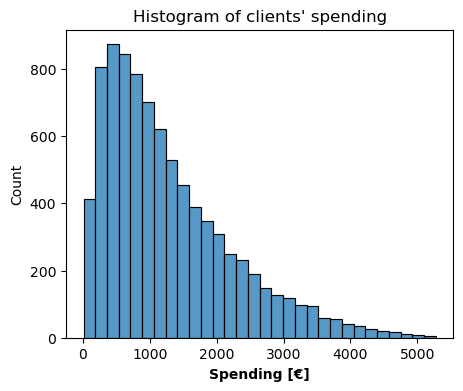

In [122]:
plt.subplots(figsize=[5,4])
sns.histplot(data=client_age, x="price", bins=30)
plt.xlabel("Spending [€]", fontweight="bold")
plt.title("Histogram of clients' spending")
plt.show()

Les dépenses totales des clients suivent une distribution log-normale. 

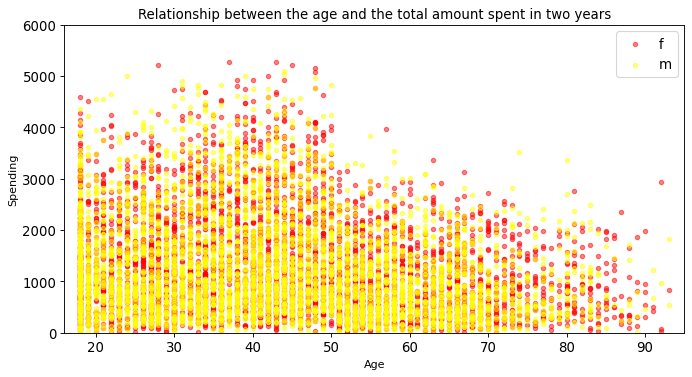

In [123]:
categories = np.unique(client_age['sex'])
colors = ["red", "yellow"]

plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('age', 'price', 
                data=client_age.loc[client_age.sex==category, :], 
                s=15, c=colors[i], label=str(category), alpha=0.5)

plt.gca().set(xlim=(16, 95), ylim=(0, 6000),
              xlabel='Age', ylabel='Spending')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Relationship between the age and the total amount spent in two years")
plt.legend(fontsize=12)    
plt.show() 

In [124]:
from scipy.stats import pearsonr
pearsonr(client_age[client_age["price"]<6000]["age"], client_age[client_age["price"]<6000]["price"])[0]

-0.1883913425033746

La corrélation entre l'âge et les dépenses est négative, mais pas très forte. Nous pouvons conclure que les clients plus jeunes dépensent plus d'argent sur les livres.

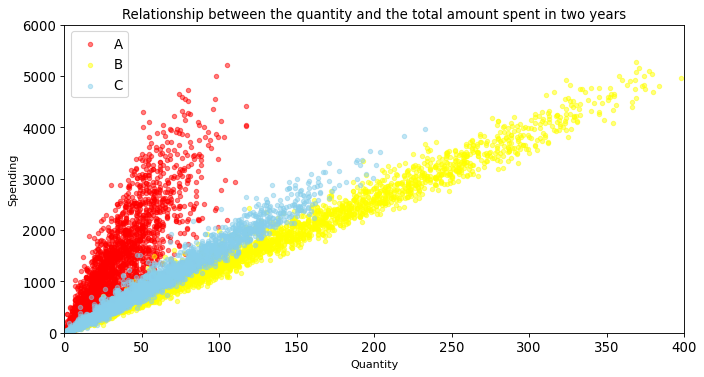

In [125]:
categories = np.unique(client_age['age_group'])
colors = ["red", "yellow", "skyblue"]

plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('n', 'price', 
                data=client_age.loc[client_age.age_group==category, :], 
                s=15, c=colors[i], label=str(category), alpha=0.5)

plt.gca().set(xlim=(0, 400), ylim=(0, 6000),
              xlabel='Quantity', ylabel='Spending')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Relationship between the quantity and the total amount spent in two years")
plt.legend(fontsize=12)    
plt.show() 

In [126]:
pearsonr(client_age["n"], client_age["price"])

(0.8356158565832105, 0.0)

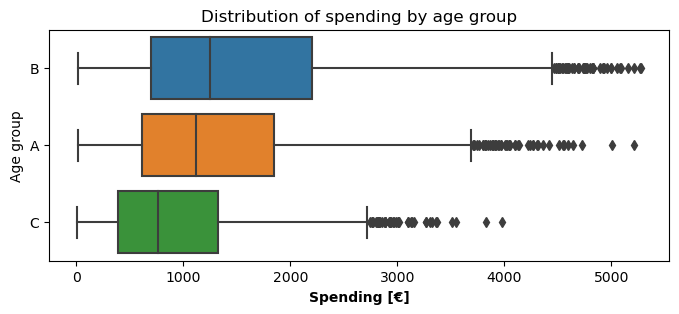

In [127]:
plt.subplots(figsize=[8,3])
sns.boxplot(data=client_age, x="price", y="age_group", orient="h")
plt.title("Distribution of spending by age group")
plt.xlabel("Spending [€]", fontweight="bold")
plt.ylabel("Age group")
plt.show()

In [2]:
mu = np.mean(client_age["price"])
s = np.std(client_age["price"])
fig, ax = plt.subplots(figsize=[5,4])
n, bins, patches = ax.hist(client_age["price"], density=True, bins=40)
plt.axvline(mu, color='r', linewidth=2)
x = np.arange(0,5000,0.1)
plt.plot(x, stats.norm.pdf(x, mu, s))
plt.title("Histogram of clients' spending")
plt.xlabel("Spending [€]")
plt.ylabel("Proportion")
plt.show()

NameError: name 'np' is not defined

In [1]:
from scipy.stats import kstest
kstest(np.log(client_age["price"]), cdf="norm")
# For p<0.05 the data doesn't follow normal distribution

NameError: name 'np' is not defined

Les dépenses des clients ne sont pas distribuées normalement, je peux donc utiliser le test de Kruskal-Wallis pour la médiane de la population, au lieu de one-way ANOVA.

In [130]:
group0 = client_age[client_age["age_group"]=="A"]["price"] 
group1 = client_age[client_age["age_group"]=="B"]["price"] 
group2 = client_age[client_age["age_group"]=="C"]["price"] 

from scipy import stats
# Kruskal-Wallis Test 
stats.kruskal(group0, group1, group2)

KruskalResult(statistic=613.4829011548962, pvalue=6.079678910156331e-134)

La valeur de p est suffisamment petite pour conclure que les trois groupes ont des medians différents.

Puisque la distribution des dépenses ressemble à une log-normale, je vais transformer les données en utilisant le logarithme des dépenses, et puis tester ANOVA.

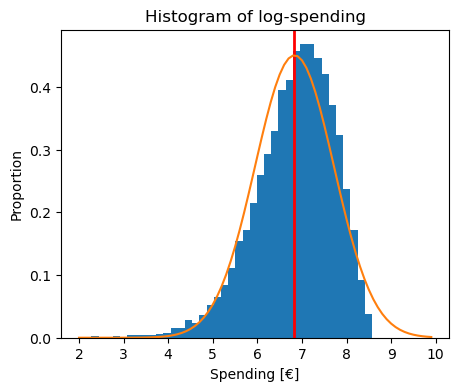

In [131]:
client_age["price_log"] = np.log(client_age["price"])

mu = np.mean(client_age["price_log"])
s = np.std(client_age["price_log"])
fig, ax = plt.subplots(figsize=[5,4])
n, bins, patches = ax.hist(client_age["price_log"], density=True, bins=40)
plt.axvline(mu, color='r', linewidth=2)
x = np.arange(2,10,0.1)
plt.plot(x, stats.norm.pdf(x, mu, s))
plt.title("Histogram of log-spending")
plt.xlabel("Spending [€]")
plt.ylabel("Proportion")
plt.show()

Il semble que les données transformées suivent la distribution normale. Je vais utiliser ANOVA pour tester les différences de dépenses moyennes par groupe d'âge.

In [132]:
#ANOVA test
fvalue, pvalue = stats.f_oneway(client_age[client_age["age_group"]=="A"]["price_log"], client_age[client_age["age_group"]=="B"]["price_log"], client_age[client_age["age_group"]=="C"]["price_log"])
print(fvalue, pvalue)

330.18202828933966 7.045367058384777e-139


Le test ANOVA est statistiquement significatif, ce qui signifie que chaque groupe d'âge a des dépenses moyennes différentes.

L'échantillon est assez grand donc je peux utiliser le t-test par paires pour tester le moyen de l'échantillon. (Central limit theorem)

In [133]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('price ~ age_group',
                data=client_age).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df           F         PR(>F)
age_group  6.143004e+08     2.0  365.860363  3.267657e-153
Residual   7.212390e+09  8591.0         NaN            NaN


In [134]:
pair_t = mod.t_test_pairwise('age_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
B-A,223.980901,24.900839,8.994914,2.870244e-19,175.169277,272.792526,0.0,True
C-A,-396.625159,25.568163,-15.512462,1.514761e-53,-446.744898,-346.505420,0.0,True
C-B,-620.606060,23.082554,-26.886368,5.944568e-153,-665.853410,-575.358710,0.0,True


Le t-test par paires montre également que les différences sont statistiquement significatives.

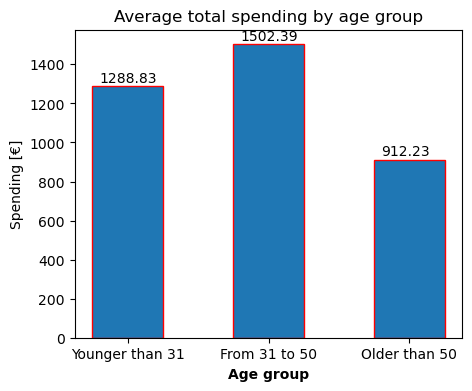

In [135]:
plt.subplots(figsize=[5,4])
categories = ["Younger than 31", "From 31 to 50", "Older than 50"]
totals = round(analyse.groupby(["client_id", "age", "age_group"])["price"].sum().groupby("age_group").mean(), 2)
plt.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 20
for i in range(len(categories)):
    plt.annotate(totals[i], (-0.2+i, totals[i] + j))
plt.title("Average total spending by age group")
plt.xlabel('Age group', fontweight="bold")
plt.ylabel('Spending [€]')
plt.show()

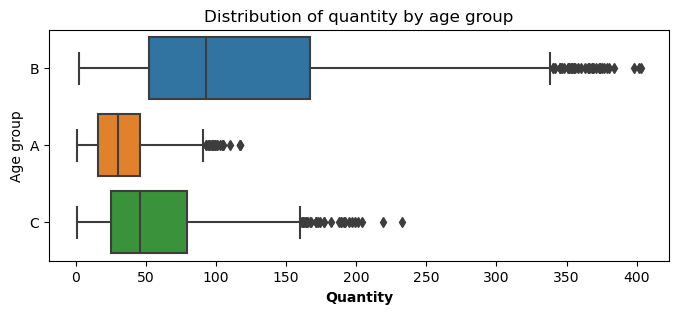

In [136]:
plt.subplots(figsize=[8,3])
sns.boxplot(data=client_age, x="n", y="age_group", orient="h")
plt.title("Distribution of quantity by age group")
plt.xlabel("Quantity", fontweight="bold")
plt.ylabel("Age group")
plt.show()

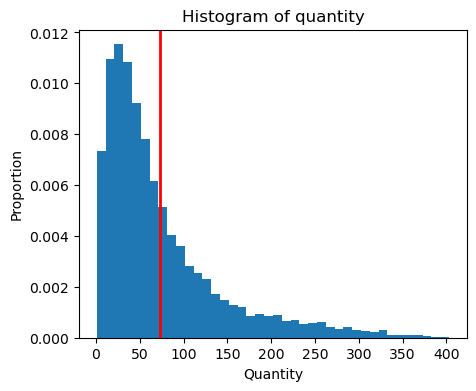

In [137]:
mu = np.mean(client_age["n"])
s = np.std(client_age["n"])
fig, ax = plt.subplots(figsize=[5,4])
n, bins, patches = ax.hist(client_age["n"], density=True, bins=40)
plt.axvline(mu, color='r', linewidth=2)
plt.title("Histogram of quantity")
plt.xlabel("Quantity")
plt.ylabel("Proportion")
plt.show()

In [138]:
kstest(client_age["n"], cdf="norm")

KstestResult(statistic=0.9929484496528009, pvalue=0.0)

In [139]:
client_age["log_n"] = np.log(client_age["n"])

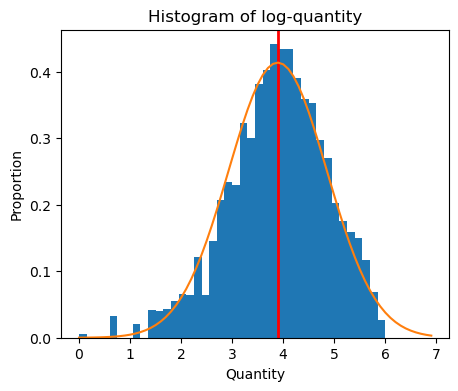

In [140]:
mu = np.mean(client_age["log_n"])
s = np.std(client_age["log_n"])
fig, ax = plt.subplots(figsize=[5,4])
n, bins, patches = ax.hist(client_age["log_n"], density=True, bins=40)
plt.axvline(mu, color='r', linewidth=2)
x = np.arange(0,7,0.1)
plt.plot(x, stats.norm.pdf(x, mu, s))
plt.title("Histogram of log-quantity")
plt.xlabel("Quantity")
plt.ylabel("Proportion")
plt.show()

In [141]:
#ANOVA test
fvalue, pvalue = stats.f_oneway(client_age[client_age["age_group"]=="A"]["log_n"], client_age[client_age["age_group"]=="B"]["log_n"], client_age[client_age["age_group"]=="C"]["log_n"])
print(fvalue, pvalue)

1659.1619417196796 0.0


Le test ANOVA est statistiquement significatif, ce qui signifie que chaque groupe d'âge achete des différentes quantité.

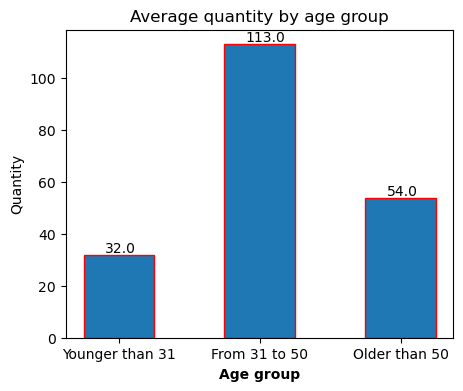

In [142]:
plt.subplots(figsize=[5,4])
categories = ["Younger than 31", "From 31 to 50", "Older than 50"]
totals = round(analyse.groupby(["client_id", "age", "age_group"])["n"].sum().groupby("age_group").mean())
plt.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 1
for i in range(len(categories)):
    plt.annotate(totals[i], (-0.1+i, totals[i] + j))
plt.title("Average quantity by age group")
plt.xlabel('Age group', fontweight="bold")
plt.ylabel('Quantity')
plt.show()

### La taille du panier moyen

In [143]:
round(analyse.groupby("session_id")["price"].sum().mean(), 2)

34.61

La valeur moyenne du panier est de **34,61€**, mais elle varie selon la tranche d'âge:

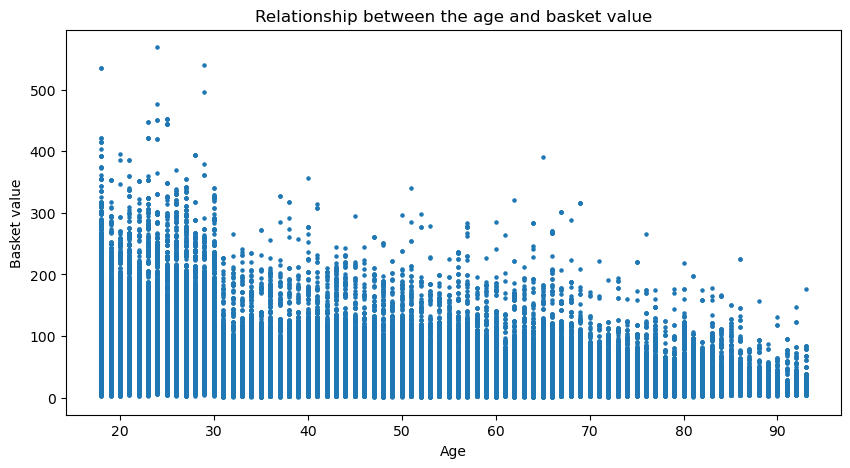

In [144]:
a = analyse.drop_duplicates(subset=["session_id"])[["session_id", "age", "age_group"]]
b = analyse.groupby(["session_id"]).sum()["price"]
c = pd.merge(a,b, how="left", on="session_id")

plt.subplots(figsize=[10,5])
plt.scatter("age", "price", data=c, s=5)
plt.xlabel("Age")
plt.ylabel("Basket value")
plt.title("Relationship between the age and basket value")
plt.show()

In [145]:
pearsonr(c["age"], c["price"])[0]

-0.33000226603441724

La corrélation entre l'âge et la valeur du panier est de -0,33; pas très forte mais on peut quand même conclure que plus jeune est le client, plus cher est son panier.

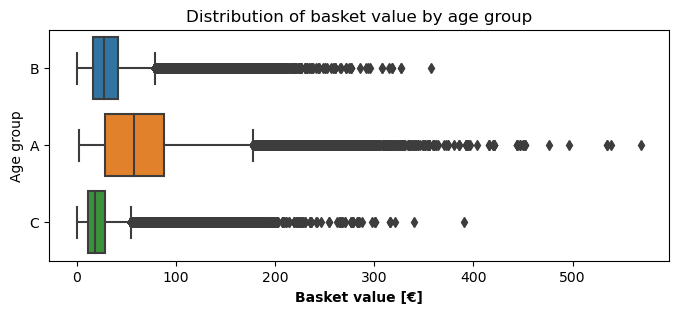

In [146]:
plt.subplots(figsize=[8,3])
sns.boxplot(data=c, x="price", y="age_group", orient="h")
plt.title("Distribution of basket value by age group")
plt.xlabel("Basket value [€]", fontweight="bold")
plt.ylabel("Age group")
plt.show()

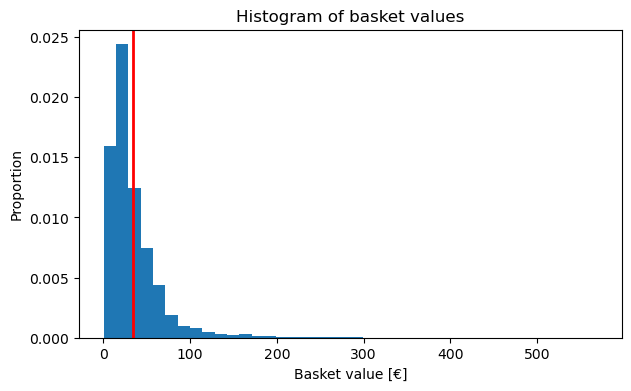

In [147]:
mu = np.mean(c["price"])
s = np.std(c["price"])
fig, ax = plt.subplots(figsize=[7,4])
n, bins, patches = ax.hist(c["price"], density=True, bins=40)
plt.axvline(mu, color='r', linewidth=2)
plt.title("Histogram of basket values")
plt.xlabel("Basket value [€]")
plt.ylabel("Proportion")
plt.show()

In [148]:
kstest(c["price"], cdf="norm")

KstestResult(statistic=0.9977169787535131, pvalue=0.0)

In [149]:
group0 = c[c["age_group"]=="A"]["price"]
group1 = c[c["age_group"]=="B"]["price"]
group2 = c[c["age_group"]=="C"]["price"]

stats.kruskal(group0, group1, group2)

KruskalResult(statistic=48678.71363791385, pvalue=0.0)

La valeur de p=0.0 => les trois groupes ont des medians différents.

In [150]:
mod = ols('price ~ age_group',
                data=c).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq        df             F  PR(>F)
age_group  6.659238e+07       2.0  40099.327397     0.0
Residual   2.561682e+08  308509.0           NaN     NaN


In [151]:
pair_t = mod.t_test_pairwise('age_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
B-A,-38.828966,0.159586,-243.310252,0.0,-39.141750,-38.516181,0.0,True
C-A,-46.461079,0.166484,-279.072978,0.0,-46.787382,-46.134776,0.0,True
C-B,-7.632113,0.113212,-67.414532,0.0,-7.854005,-7.410221,0.0,True


Les t-tests par paires montrent aussi que les différences sont statistiquement significatives.

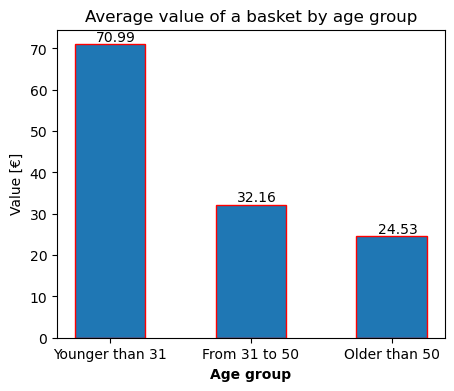

In [152]:
plt.subplots(figsize=[5,4])
categories = ["Younger than 31", "From 31 to 50", "Older than 50"]
totals = round(analyse.groupby(["age_group", "session_id"]).sum().groupby("age_group")["price"].mean(), 2)
plt.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 0.75
for i in range(len(categories)):
    plt.annotate(totals[i], (-0.1+i, totals[i] + j))
plt.title("Average value of a basket by age group")
plt.xlabel('Age group', fontweight="bold")
plt.ylabel("Value [€]")
plt.show()

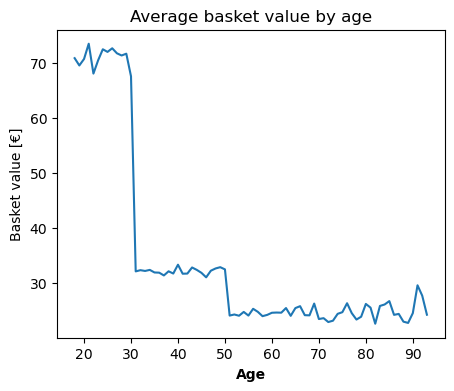

In [153]:
plt.subplots(figsize=[5,4])
analyse.groupby(["session_id", "age"])["price"].sum().groupby("age").mean().plot()
plt.title("Average basket value by age")
plt.xlabel("Age", fontweight="bold")
plt.ylabel("Basket value [€]")
plt.show()

La valeur moyenne du panier est la plus élevée pour les moins de 31 ans et la plus faible pour les plus de 50 ans.

In [154]:
round(analyse.groupby("session_id")["n"].sum().mean(), 2)

1.99

Le panier d'un client contient en moyenne 2 articles.

In [155]:
an = analyse.groupby(["session_id"]).count()["n"]
cn = pd.merge(a, an, how="left", on="session_id")

In [156]:
cont_cn = pd.crosstab(cn["age_group"], cn["n"])
cont_cn

n,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age_group,,,,,,,,,,,,,,
A,24431,9577,3287,1775,1022,566,310,87,59,16,8,0,0,1
B,42592,51833,34525,17418,6793,2576,949,293,119,30,8,6,3,0
C,80156,20268,4743,2207,1448,773,385,162,56,24,4,0,2,0


In [157]:
cn["n2"] = cn["n"]

for i in range(0, len(cn["n"])):
    if cn["n2"][i]>5:
        cn["n2"][i]=">5"


C:\Users\majai\AppData\Local\Temp/ipykernel_34904/751324310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn["n2"][i]=">5"
C:\Users\majai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [158]:
cont_cn = pd.crosstab(cn["age_group"], cn["n2"])
cont_cn

n2,1,2,3,4,5,>5
age_group,,,,,,
A,24431,9577,3287,1775,1022,1047
B,42592,51833,34525,17418,6793,3984
C,80156,20268,4743,2207,1448,1406


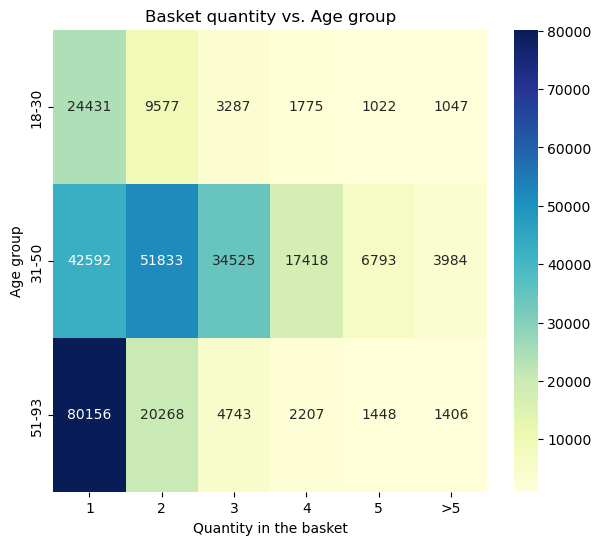

In [159]:
fig, ax = plt.subplots(figsize=(7,6)) 
sns.heatmap(cont_cn, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Basket quantity vs. Age group")
plt.xlabel("Quantity in the basket")
plt.ylabel("Age group") 
labels = ["18-30", "31-50", "51-93"]
ax.set_yticklabels(labels)
plt.show()

In [160]:
c, p, dof, expected = chi2_contingency(cont_cn)
p

0.0

Chi2 test donne une valeur p<0.05, ce qui signifie que la quantité dans le panier dépend du groupe d'âge.

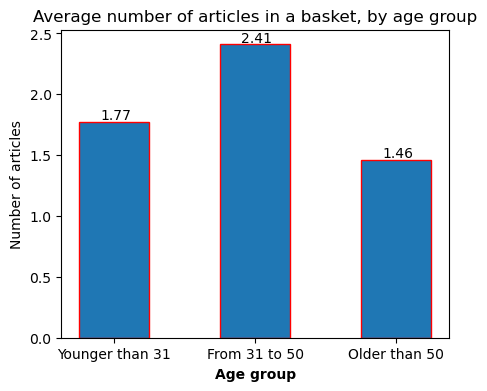

In [161]:
plt.subplots(figsize=[5,4])
categories = ["Younger than 31", "From 31 to 50", "Older than 50"]
totals = round(analyse.groupby(["age_group", "session_id"]).count().groupby("age_group")["n"].mean(), 2)
plt.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 0.02
for i in range(len(categories)):
    plt.annotate(totals[i], (-0.1+i, totals[i] + j))
plt.title("Average number of articles in a basket, by age group")
plt.xlabel('Age group', fontweight="bold")
plt.ylabel("Number of articles")
plt.show()

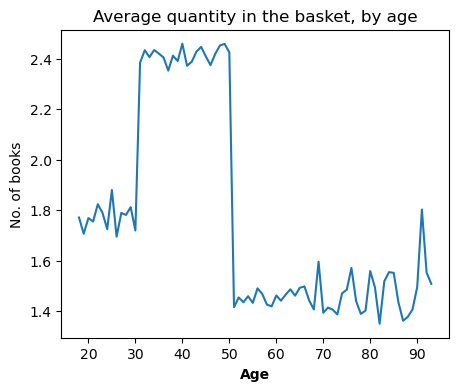

In [162]:
plt.subplots(figsize=[5,4])
analyse.groupby(["session_id", "age"])["n"].sum().groupby("age").mean().plot()
plt.title("Average quantity in the basket, by age")
plt.xlabel("Age", fontweight="bold")
plt.ylabel("No. of books")
plt.show()

Les moins de 31 ans achètent moins d'articles d'un coup, mais dépensent plus d'argent (car ils achètent surtout des livres de catégorie 2 qui sont les plus chers).

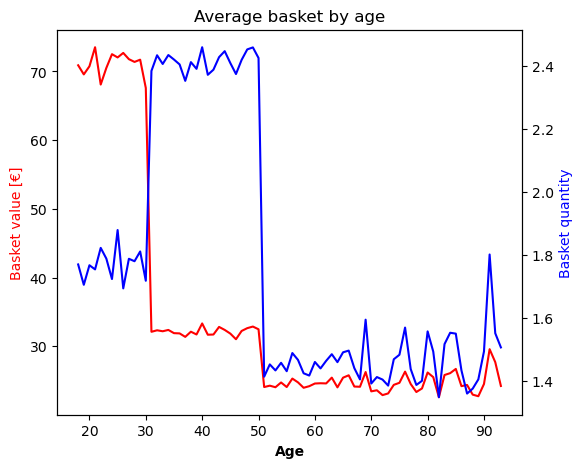

In [163]:
fig,ax = plt.subplots(figsize=[6,5])

x = analyse.groupby("age")["age"].mean()
p = analyse.groupby(["session_id", "age"])["price"].sum().groupby("age").mean()
q = analyse.groupby(["session_id", "age"])["n"].sum().groupby("age").mean()

ax.plot(x, p, color="red")
ax.set_xlabel("Age",fontweight="bold")
ax.set_ylabel("Basket value [€]",color="red")

ax2=ax.twinx()
ax2.plot(x, q,color="blue")
ax2.set_ylabel("Basket quantity",color="blue")

plt.title("Average basket by age")
plt.show()


### La fréquence d’achat

In [164]:
freq = analyse.drop_duplicates(subset=["session_id"])
freq = freq.groupby(["client_id"])["session_id"].count()
round(freq.mean(), 2)

35.9

En moyenne, un client a acheté 36 fois dans la boutique en ligne, mais il y a une différence selon la tranche d'âge.

In [165]:
freq = pd.merge(freq, customers, how="left", on="client_id")

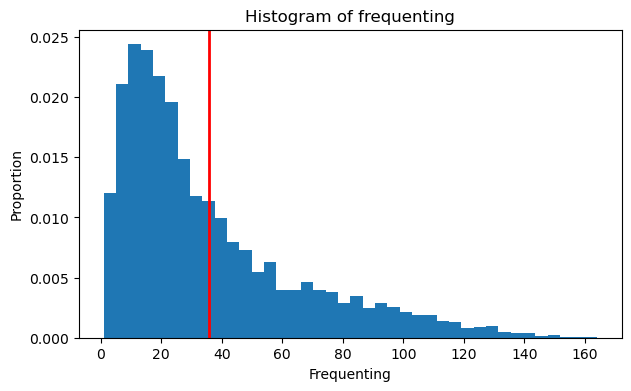

In [166]:
mu = np.mean(freq["session_id"])
s = np.std(freq["session_id"])
fig, ax = plt.subplots(figsize=[7,4])
n, bins, patches = ax.hist(freq["session_id"], density=True, bins=40)
plt.axvline(mu, color='r', linewidth=2)
plt.title("Histogram of frequenting")
plt.xlabel("Frequenting")
plt.ylabel("Proportion")
plt.show()

In [167]:
kstest(freq["session_id"], cdf="norm")

KstestResult(statistic=0.9867813563318794, pvalue=0.0)

In [168]:
freq["age_group"] = freq["age"].apply(age_group)

In [169]:
group0 = freq[freq["age_group"]=="A"]["session_id"]
group1 = freq[freq["age_group"]=="B"]["session_id"]
group2 = freq[freq["age_group"]=="C"]["session_id"]

stats.kruskal(group0, group1, group2)

KruskalResult(statistic=1391.5329468221798, pvalue=6.799232689976672e-303)

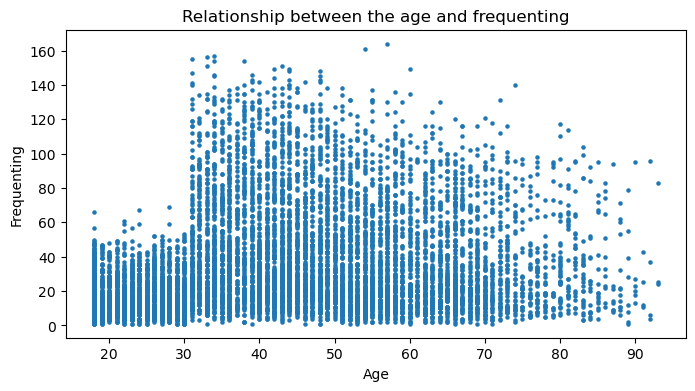

In [170]:
plt.subplots(figsize=[8,4])
plt.scatter("age", "session_id", data=freq, s=5)
plt.xlabel("Age")
plt.ylabel("Frequenting")
plt.title("Relationship between the age and frequenting")
plt.show()


In [171]:
pearsonr(freq["age"], freq["session_id"])[0]

0.16758453781718752

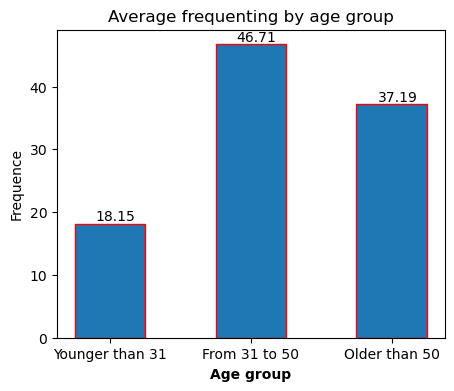

In [172]:
plt.subplots(figsize=[5,4])

freq_age = analyse.drop_duplicates(subset=["session_id"])
freq_age = freq_age.groupby(["client_id", "age_group"])["session_id"].count()

categories = ["Younger than 31", "From 31 to 50", "Older than 50"]
totals = round(freq_age.groupby("age_group").mean(), 2)
plt.bar(categories, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1.0
j = 0.5
for i in range(len(categories)):
    plt.annotate(totals[i], (-0.1+i, totals[i] + j))
plt.title("Average frequenting by age group")
plt.xlabel('Age group', fontweight="bold")
plt.ylabel("Frequence")
plt.show()

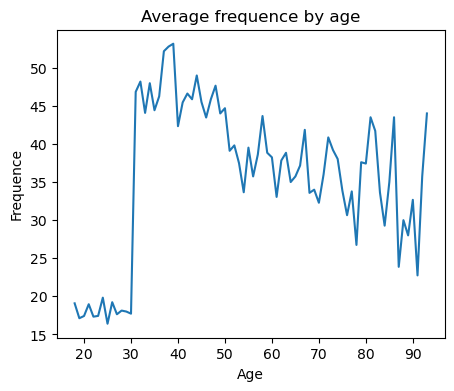

In [173]:
plt.subplots(figsize=[5,4])
freq_age = analyse.drop_duplicates(subset=["session_id"])
freq_age = freq_age.groupby(["client_id", "age"])["session_id"].count()
freq_age.groupby("age").mean().plot()
plt.title("Average frequence by age")
plt.xlabel("Age")
plt.ylabel("Frequence")
plt.show()

### Les catégories des livres achetés

C:\Users\majai\AppData\Local\Temp/ipykernel_34904/2827330706.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = analyse[(analyse["age"]>30)&(data["age"]<51)].groupby("categ")["price"].sum()


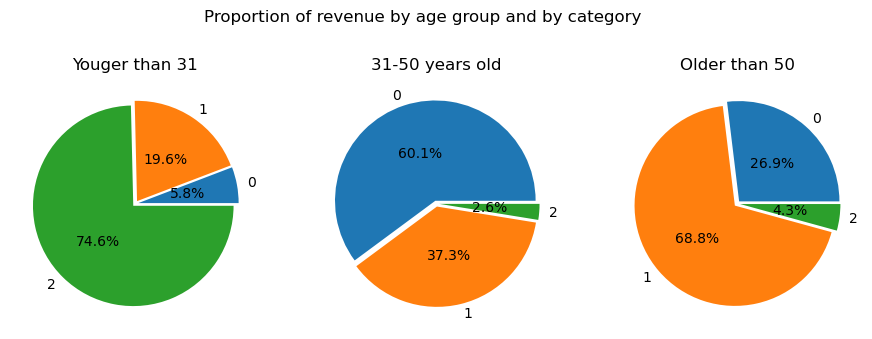

In [174]:
fig, axes = plt.subplots(1,3, figsize=[11,4])
fig.suptitle("Proportion of revenue by age group and by category")
labs = ["0", "1", "2"]

ax = axes[0]
a = analyse[analyse["age"]<31].groupby("categ")["price"].sum()
ax.pie(a, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("Youger than 31")

ax = axes[1]
b = analyse[(analyse["age"]>30)&(data["age"]<51)].groupby("categ")["price"].sum()
ax.pie(b, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("31-50 years old")

ax = axes[2]
c = analyse[analyse["age"]>50].groupby("categ")["price"].sum()
ax.pie(c, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("Older than 50")

plt.show()

In [175]:
pod = pd.pivot_table(analyse, values={"n", "price", "price_0", "price_1", "price_2"}, index=["client_id"], aggfunc=np.sum)
pod = pd.merge(pod, customers, how="left", on="client_id")

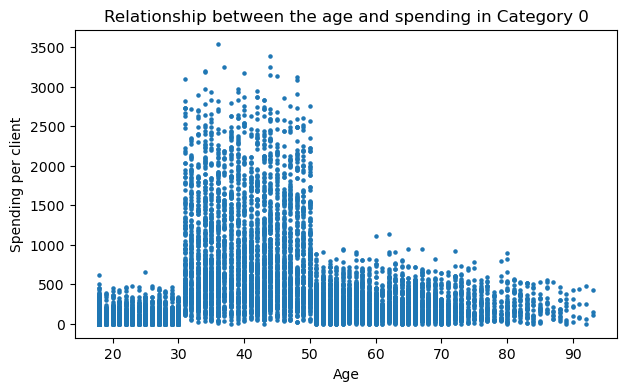

In [176]:
plt.subplots(figsize=[7,4])
plt.scatter("age", "price_0", data=pod, s=5)
plt.xlabel("Age")
plt.ylabel("Spending per client")
plt.title("Relationship between the age and spending in Category 0")
plt.show()

In [177]:
pearsonr(pod["age"], pod["price_0"])[0]

0.0027973085020877655

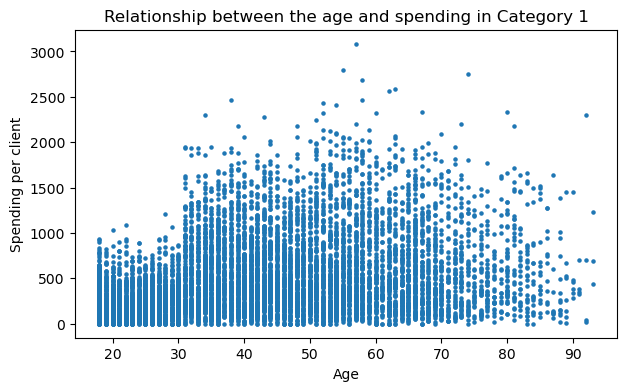

In [178]:
plt.subplots(figsize=[7,4])
plt.scatter("age", "price_1", data=pod, s=5)
plt.xlabel("Age")
plt.ylabel("Spending per client")
plt.title("Relationship between the age and spending in Category 1")
plt.show()

In [179]:
pearsonr(pod["age"], pod["price_1"])[0]

0.2839568731946158

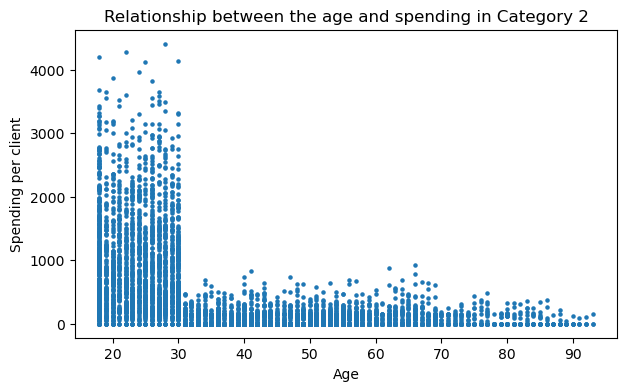

In [180]:
plt.subplots(figsize=[7,4])
plt.scatter("age", "price_2", data=pod, s=5)
plt.xlabel("Age")
plt.ylabel("Spending per client")
plt.title("Relationship between the age and spending in Category 2")
plt.show()

In [181]:
pearsonr(pod["age"], pod["price_2"])[0]

-0.5037966542962979

C:\Users\majai\AppData\Local\Temp/ipykernel_34904/1564183773.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = analyse[(analyse["age"]>30)&(data["age"]<51)].groupby("categ")["n"].sum()


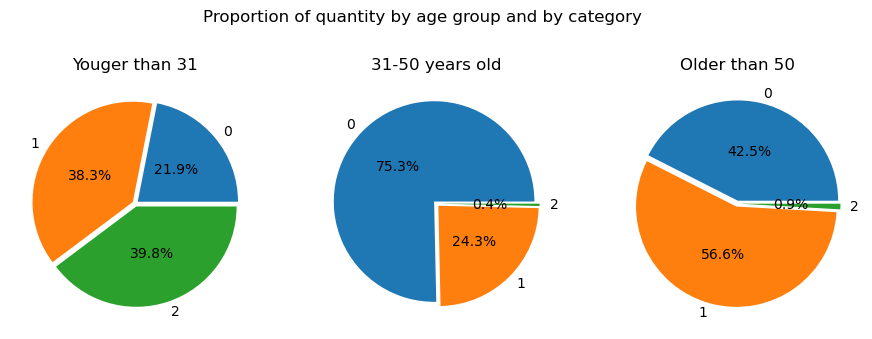

In [182]:
fig, axes = plt.subplots(1,3, figsize=[11,4])
fig.suptitle("Proportion of quantity by age group and by category")
labs = ["0", "1", "2"]

ax = axes[0]
a = analyse[analyse["age"]<31].groupby("categ")["n"].sum()
ax.pie(a, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("Youger than 31")

ax = axes[1]
b = analyse[(analyse["age"]>30)&(data["age"]<51)].groupby("categ")["n"].sum()
ax.pie(b, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("31-50 years old")

ax = axes[2]
c = analyse[analyse["age"]>50].groupby("categ")["n"].sum()
ax.pie(c, autopct="%.1f%%", explode=[0.03]*3, pctdistance=0.5, labels=labs)
ax.set_ylabel("")
ax.set_title("Older than 50")

plt.show()

In [183]:
contigency1 = pd.crosstab(analyse["age_group"], analyse["categ"])
contigency1

categ,0.0,1.0,2.0
age_group,,,
A,15920,27879,28912
B,285920,92133,1430
C,68229,90765,1438


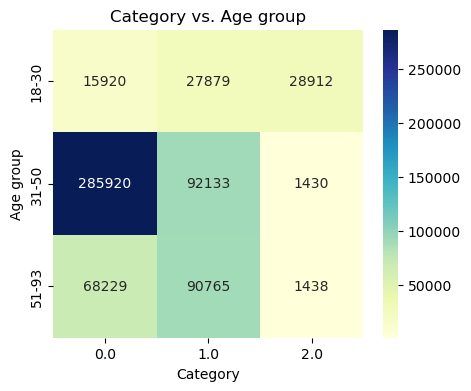

In [184]:
fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(contigency1, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Category vs. Age group")
plt.xlabel("Category")
plt.ylabel("Age group"), 
labels = ["18-30", "31-50", "51-93"]
ax.set_yticklabels(labels)
plt.show()

In [185]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency1)
p

0.0

Chi2 test donne une valeur p=0.00, ce qui signifie que la categorie dépend du groupe d'âge.

**CONCLUSION**

En deux ans, la boutique en ligne Lapage a vendu 679 322 livres pour un total de 11 856 321€. Les revenues quotidiens étaient compris entre 14K€ et 20K€ (sauf en octobre 2021 où ils étaient de 8K à 10K€ par jour – il est possible que les données ne soient pas complètement collectées pour ce mois). 

8 623 clients pouvaient choisir parmi 3 286 titres, répartis en trois catégories : 0 (70,2 %), 1 (22,5 %) et 2 (7,3 %). Le prix des livres variait selon la catégorie, de sorte que le prix moyen des livres de la catégorie 0 était de 11,73€, le prix moyen de la catégorie 1 était de 25,53€, et la catégorie 2 était la plus chère avec un prix moyen de 108,35€. 

Le comportement des clients ne dépendait pas significativement du sexe, mais de l'âge. Nous pouvons diviser les clients en trois groupes d'âge : moins de 31 ans, entre 31 et 50 ans, plus de 50 ans. 

Les moins de 31 ans ont dépensé le plus d'argent dans la catégorie 2, qui est la plus chère. Ils ont généralement moins de 2 livres dans le panier, mais leur panier moyen s'élève à 71€, soit plus du double de la valeur moyenne du panier des clients des autres tranches d'âge. 

Le tableau ci-dessous regroupe les chiffres les plus importants par groupe d'âge.

In [186]:
table = pd.read_csv('Table.csv')
table = table.rename(columns={"Younger than 31": "<31", "Between 31 and 50": "31-50", "Older than 50": ">50"}, index=table["Measure"]).drop(columns=["Measure"])
table

,<31,31-50,>50,All
Avg. total spending,1298.00,1502.00,912.00,1277.00
Avg. total quantity,32.00,113.00,54.00,74.00
Avg. basket value,71.00,32.16,24.53,34.61
Avg. basket quantity,1.77,2.41,1.46,2.00
Frequency,18.00,46.70,37.20,36.00
Favourite category,2.00,0.00,1.00,NaN
Perc. Spent in categ,75.00,60.00,69.00,NaN
